In [1]:
import numpy as np
import pandas as pd

import missingno as msno

from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

## 1. 국가_온실가스_분야별_배출량_추이.csv

에너지, 산업공정, 농업, 토지이용 ·토지이용 변화 및 임업(LULUCF), 폐기물 분야의 온실가스 배출량 통계자료

In [2]:
# multiindex 로 자료 불러오기
# skipinitialspace: True일때, 구분문자 이후의 공백을 생략

df1 = pd.read_csv('./datas/ghg.csv', encoding='euc-kr', index_col=[0,1,2], skipinitialspace=True)
df1

1990     1991  \
분류(1)                분류(2)             분류(3)                            
총배출량                 소계                소계             292.19   315.46   
순배출량                 소계                소계            254.404  281.908   
1. 에너지               소계                소계            240.399   258.24   
                     A. 연료연소           소계            235.287  253.681   
                                       1. 에너지산업       48.442   54.904   
                                       2. 제조업 및 건설업   76.558       88   
                                       3. 수송          35.506   38.607   
                                       4. 기타          74.599   67.514   
                                       5. 미분류          0.181    4.655   
                     B. 탈루             소계              5.112    4.559   
                                       1. 고체연료         4.833    4.227   
                                       2. 석유 및 천연가스     0.28    0.332   
2. 산업공정              소계                소계             20.444    24.35   
                     A. 광물산업           소계             18.823   22.482   
                     B. 화학산업           소계               0.37    0.659   
                     C. 금속산업           소계              0.095    0.078   
                     D. 기타산업           소계                NaN      NaN   
                     E. 할로카본 및 육불화황 생산 소계              0.983    0.799   
                     F. 할로카본 및 육불화황 소비 소계              0.173    0.333   
4. 농업                소계                소계             20.972   21.238   
                     A. 장내발효           소계               2.96    3.125   
                     B. 가축 분뇨처리        소계              2.846    3.061   
                     C. 벼재배            소계             10.533   10.371   
                     D. 농경지토양          소계              4.606    4.659   
                     E. 사바나 소각         소계                 NO       NO   
                     F. 작물잔사소각         소계              0.027    0.024   
5. 토지이용, 토지이용변화 및 임업 소계                소계            -37.786  -33.552   
                     A. 산림지            소계            -38.227  -34.164   
                     B. 농경지            소계              0.679    0.906   
                     C. 초지             소계             -0.536   -0.568   
                     D. 습지             소계              0.296    0.275   
                     E. 정주지            소계                 NE       NE   
                     F. 기타 토지          소계                 NE       NE   
6. 폐기물               소계                소계             10.375   11.632   
                     A. 폐기물매립          소계              7.492    8.203   
                     B. 하폐수처리          소계              1.454    1.508   
                     C. 폐기물 소각         소계              1.429     1.92   
                     D. 기타             소계                NaN      NaN   

                                                        1992     1993  \
분류(1)                분류(2)             분류(3)                            
총배출량                 소계                소계            343.482  378.674   
순배출량                 소계                소계            310.859  347.853   
1. 에너지               소계                소계            279.147  308.655   
                     A. 연료연소           소계            275.357  305.495   
                                       1. 에너지산업       62.515    68.91   
                                       2. 제조업 및 건설업   97.959  108.051   
                                       3. 수송          43.971   55.562   
                                       4. 기타          67.971   69.824   
                                       5. 미분류          2.941    3.148   
                     B. 탈루             소계               3.79     3.16   
                                       1. 고체연료          3.36    2.641   
                                       2. 석유 및 천연가스     0.43    0.519   
2. 산업공정              소계                소계             29.954   34.422   
                     A. 광물산업           소

In [3]:
df1.head(5)

1990     1991     1992     1993     1994     1995  \
분류(1)  분류(2)   분류(3)                                                            
총배출량   소계      소계         292.19   315.46  343.482  378.674   403.69  433.892   
순배출량   소계      소계        254.404  281.908  310.859  347.853  370.778   402.97   
1. 에너지 소계      소계        240.399   258.24  279.147  308.655  327.988  352.171   
       A. 연료연소 소계        235.287  253.681  275.357  305.495  325.255  349.783   
               1. 에너지산업   48.442   54.904   62.515    68.91   83.783    91.88   

                            1996     1997     1998     1999  ...     2009  \
분류(1)  분류(2)   분류(3)                                         ...            
총배출량   소계      소계        470.463  502.115  431.532  469.519  ...  597.983   
순배출량   소계      소계        436.106  463.071  383.932  414.154  ...  541.599   
1. 에너지 소계      소계        385.815  411.871  351.654  382.291  ...  513.055   
       A. 연료연소 소계        383.419  409.395  349.303  379.755  ...  509.771   
               1. 에너지산업  109.199  122.568  106.447   116.32  ...  230.635   

                            2010     2011     2012     2013     2014     2015  \
분류(1)  분류(2)   분류(3)                                                            
총배출량   소계      소계        656.323   684.93  688.308  697.384  691.933  692.515   
순배출량   소계      소계        602.477  632.324  641.311  654.849   648.65  648.153   
1. 에너지 소계      소계         566.12  595.093  596.471  605.014  597.373  600.696   
       A. 연료연소 소계         562.31  591.021   592.09   600.52   593.26  596.903   
               1. 에너지산업   256.11  263.754   267.77  274.174  259.529  261.787   

                            2016     2017     2018  
분류(1)  분류(2)   분류(3)                                
총배출량   소계      소계        693.535   709.75  727.633  
순배출량   소계      소계        647.975  668.262  686.348  
1. 에너지 소계      소계        602.661  615.658  632.376  
       A. 연료연소 소계        598.727  611.642  627.909  
               1. 에너지산업  263.657  270.986  287.614  

[5 rows x 29 columns]

In [4]:
df1.tail()

1990    1991    1992   1993    1994    1995    1996  \
분류(1)  분류(2)     분류(3)                                                          
6. 폐기물 소계        소계     10.375  11.632  12.739  13.49  14.406  15.755  16.544   
       A. 폐기물매립  소계      7.492   8.203   8.745   9.16   9.552   9.796  10.099   
       B. 하폐수처리  소계      1.454   1.508   1.613  1.428   1.774   1.784   1.711   
       C. 폐기물 소각 소계      1.429    1.92   2.382  2.902   3.066   4.173   4.729   
       D. 기타     소계        NaN     NaN     NaN    NaN   0.014   0.002   0.005   

                          1997    1998    1999  ...    2009    2010    2011  \
분류(1)  분류(2)     분류(3)                          ...                           
6. 폐기물 소계        소계      17.26  16.046  16.864  ...  15.478  15.181  15.836   
       A. 폐기물매립  소계     10.436   9.548    9.52  ...   7.934   7.755    7.61   
       B. 하폐수처리  소계      1.568    1.58   1.562  ...   1.496   1.625   1.833   
       C. 폐기물 소각 소계      5.241   4.904   5.728  ...   5.713   5.643   6.201   
       D. 기타     소계      0.016   0.015   0.054  ...   0.336   0.158   0.192   

                          2012    2013    2014    2015    2016    2017    2018  
분류(1)  분류(2)     분류(3)                                                          
6. 폐기물 소계        소계     15.946  16.203  15.645  16.553  16.832  17.204  17.092  
       A. 폐기물매립  소계       7.25   7.184   7.335   7.727   7.598   7.875   7.834  
       B. 하폐수처리  소계      1.657   1.737   1.672   1.627   1.724   1.793   1.741  
       C. 폐기물 소각 소계      6.844   6.986    6.34   6.874   7.146   7.178   7.098  
       D. 기타     소계      0.194   0.295   0.297   0.324   0.364   0.359   0.419  

[5 rows x 29 columns]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38 entries, ('총배출량', '소계', '소계') to ('6. 폐기물', 'D. 기타', '소계')
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    36 non-null     object
 1   1991    36 non-null     object
 2   1992    36 non-null     object
 3   1993    36 non-null     object
 4   1994    37 non-null     object
 5   1995    37 non-null     object
 6   1996    37 non-null     object
 7   1997    37 non-null     object
 8   1998    37 non-null     object
 9   1999    37 non-null     object
 10  2000    37 non-null     object
 11  2001    37 non-null     object
 12  2002    37 non-null     object
 13  2003    36 non-null     object
 14  2004    36 non-null     object
 15  2005    36 non-null     object
 16  2006    36 non-null     object
 17  2007    37 non-null     object
 18  2008    36 non-null     object
 19  2009    36 non-null     object
 20  2010    36 non-null     object
 21  2011    36 non-null   

<AxesSubplot:>

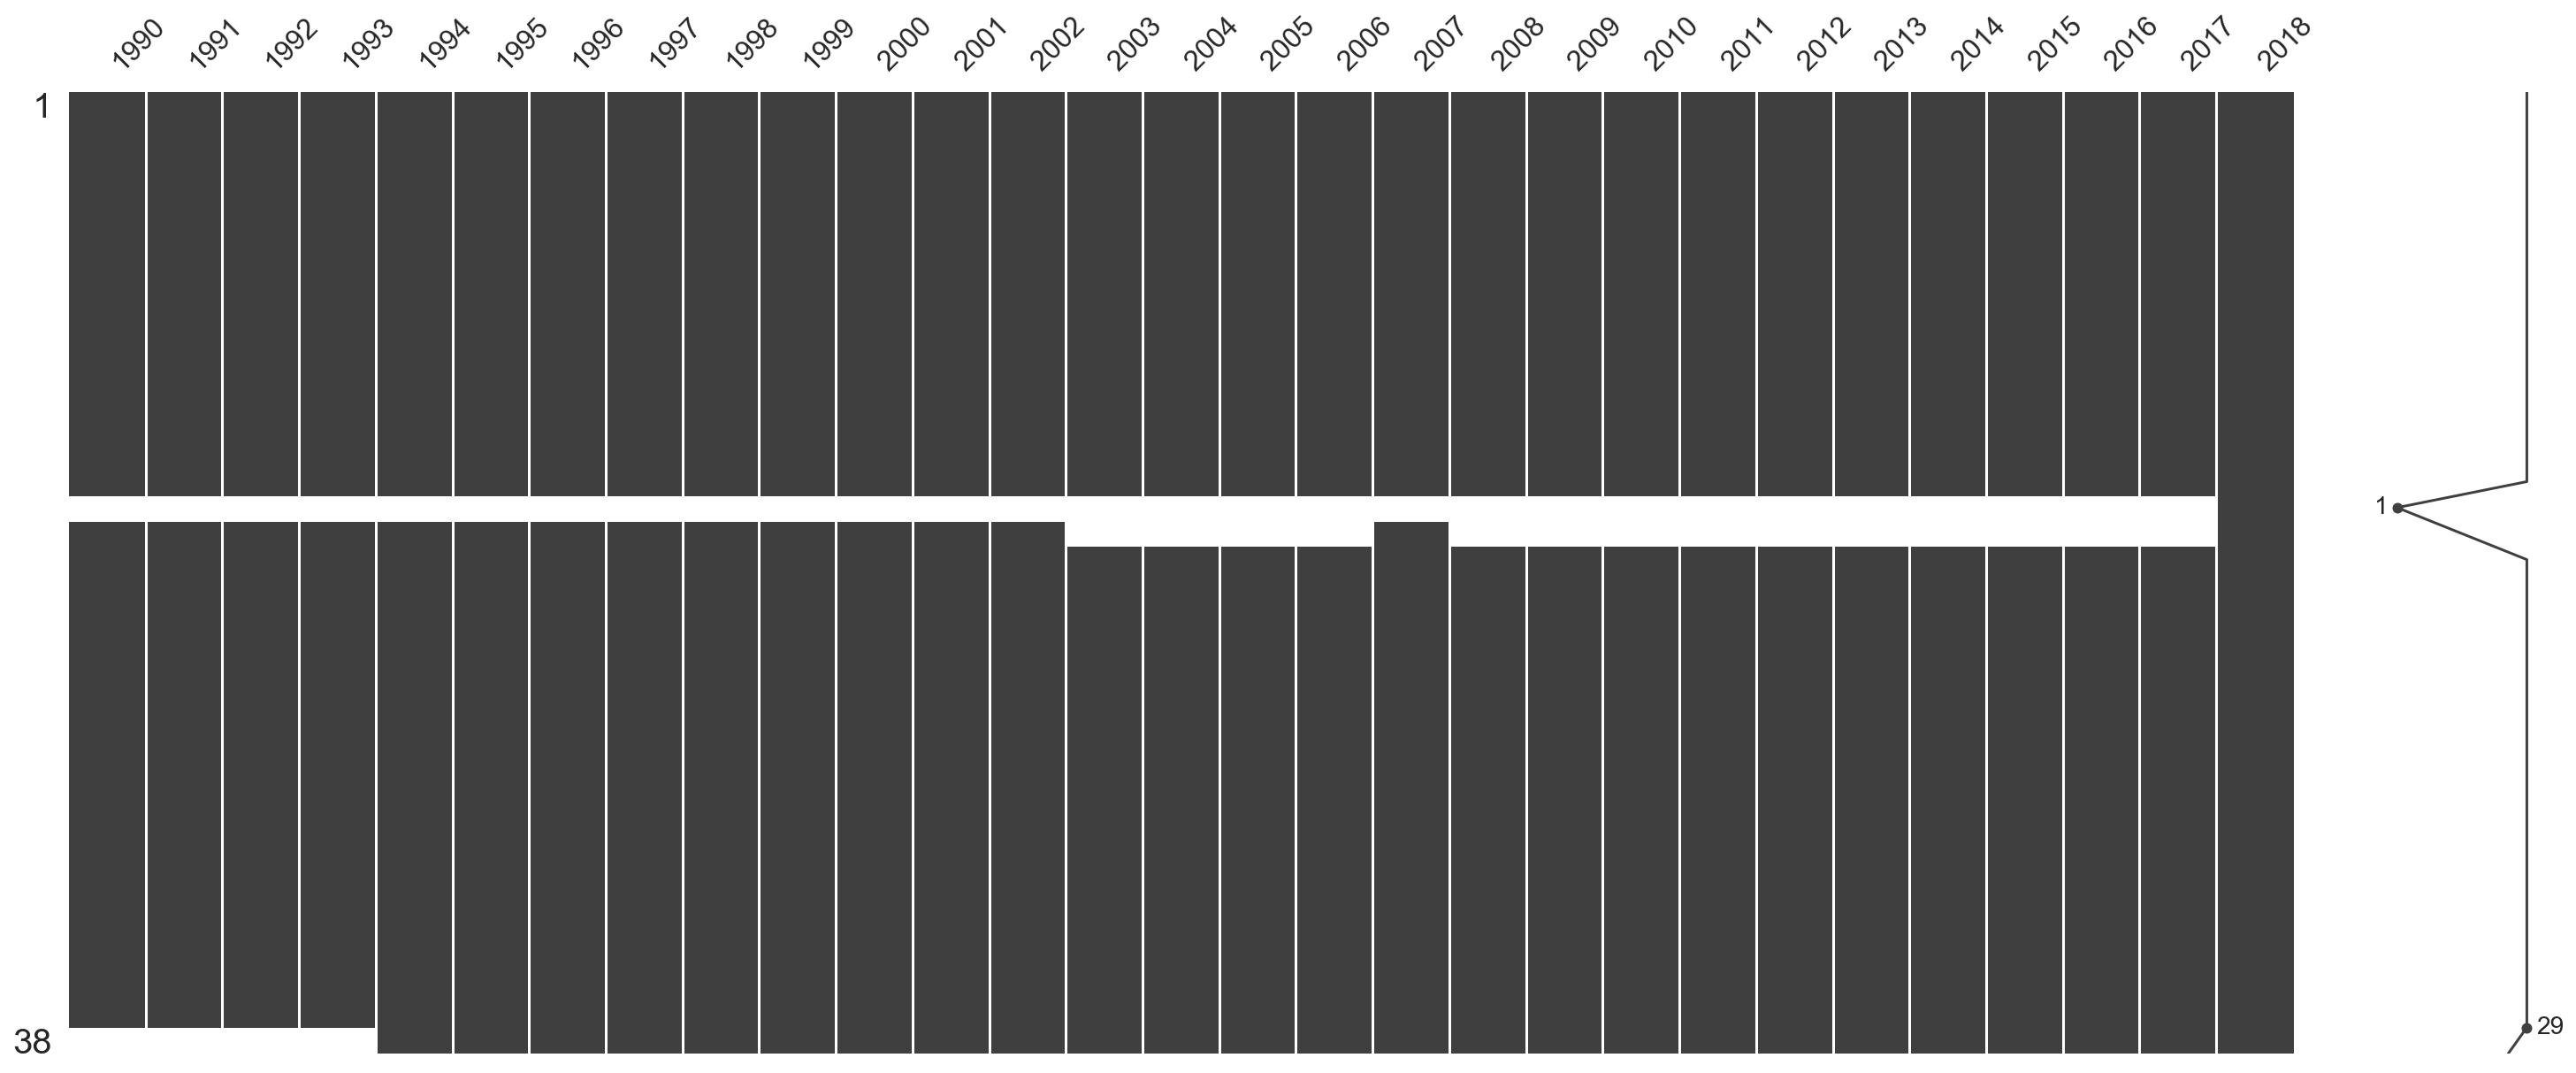

In [6]:
msno.matrix(df1)

In [7]:
df1.isnull()

1990   1991   1992  \
분류(1)                분류(2)             분류(3)                               
총배출량                 소계                소계            False  False  False   
순배출량                 소계                소계            False  False  False   
1. 에너지               소계                소계            False  False  False   
                     A. 연료연소           소계            False  False  False   
                                       1. 에너지산업      False  False  False   
                                       2. 제조업 및 건설업  False  False  False   
                                       3. 수송         False  False  False   
                                       4. 기타         False  False  False   
                                       5. 미분류        False  False  False   
                     B. 탈루             소계            False  False  False   
                                       1. 고체연료       False  False  False   
                                       2. 석유 및 천연가스  False  False  False   
2. 산업공정              소계                소계            False  False  False   
                     A. 광물산업           소계            False  False  False   
                     B. 화학산업           소계            False  False  False   
                     C. 금속산업           소계            False  False  False   
                     D. 기타산업           소계             True   True   True   
                     E. 할로카본 및 육불화황 생산 소계            False  False  False   
                     F. 할로카본 및 육불화황 소비 소계            False  False  False   
4. 농업                소계                소계            False  False  False   
                     A. 장내발효           소계            False  False  False   
                     B. 가축 분뇨처리        소계            False  False  False   
                     C. 벼재배            소계            False  False  False   
                     D. 농경지토양          소계            False  False  False   
                     E. 사바나 소각         소계            False  False  False   
                     F. 작물잔사소각         소계            False  False  False   
5. 토지이용, 토지이용변화 및 임업 소계                소계            False  False  False   
                     A. 산림지            소계            False  False  False   
                     B. 농경지            소계            False  False  False   
                     C. 초지             소계            False  False  False   
                     D. 습지             소계            False  False  False   
                     E. 정주지            소계            False  False  False   
                     F. 기타 토지          소계            False  False  False   
6. 폐기물               소계                소계            False  False  False   
                     A. 폐기물매립          소계            False  False  False   
                     B. 하폐수처리          소계            False  False  False   
                     C. 폐기물 소각         소계            False  False  False   
                     D. 기타             소계             True   True   True   

                                                      1993   1994   1995  \
분류(1)                분류(2)             분류(3)                               
총배출량                 소계                소계            False  False  False   
순배출량                 소계                소계            False  False  False   
1. 에너지               소계                소계            False  False  False   
                     A. 연료연소           소계            False  False  False   
                                       1. 에너지산업      False  False  False   
                                       2. 제조업 및 건설업  False  False  False   
                                       3. 수송         False  False  False   
                                       4. 기타         False  False  False   
                                       5. 미분류        False  False  False   
                     B. 탈루             소계            False  False  False   
                                       1. 고체연료       False  False  False   
                         

In [8]:
# 결측치 채우기
df1.fillna(value=0, inplace=True)

In [9]:
df1.replace('-', 0, inplace=True)

<AxesSubplot:>

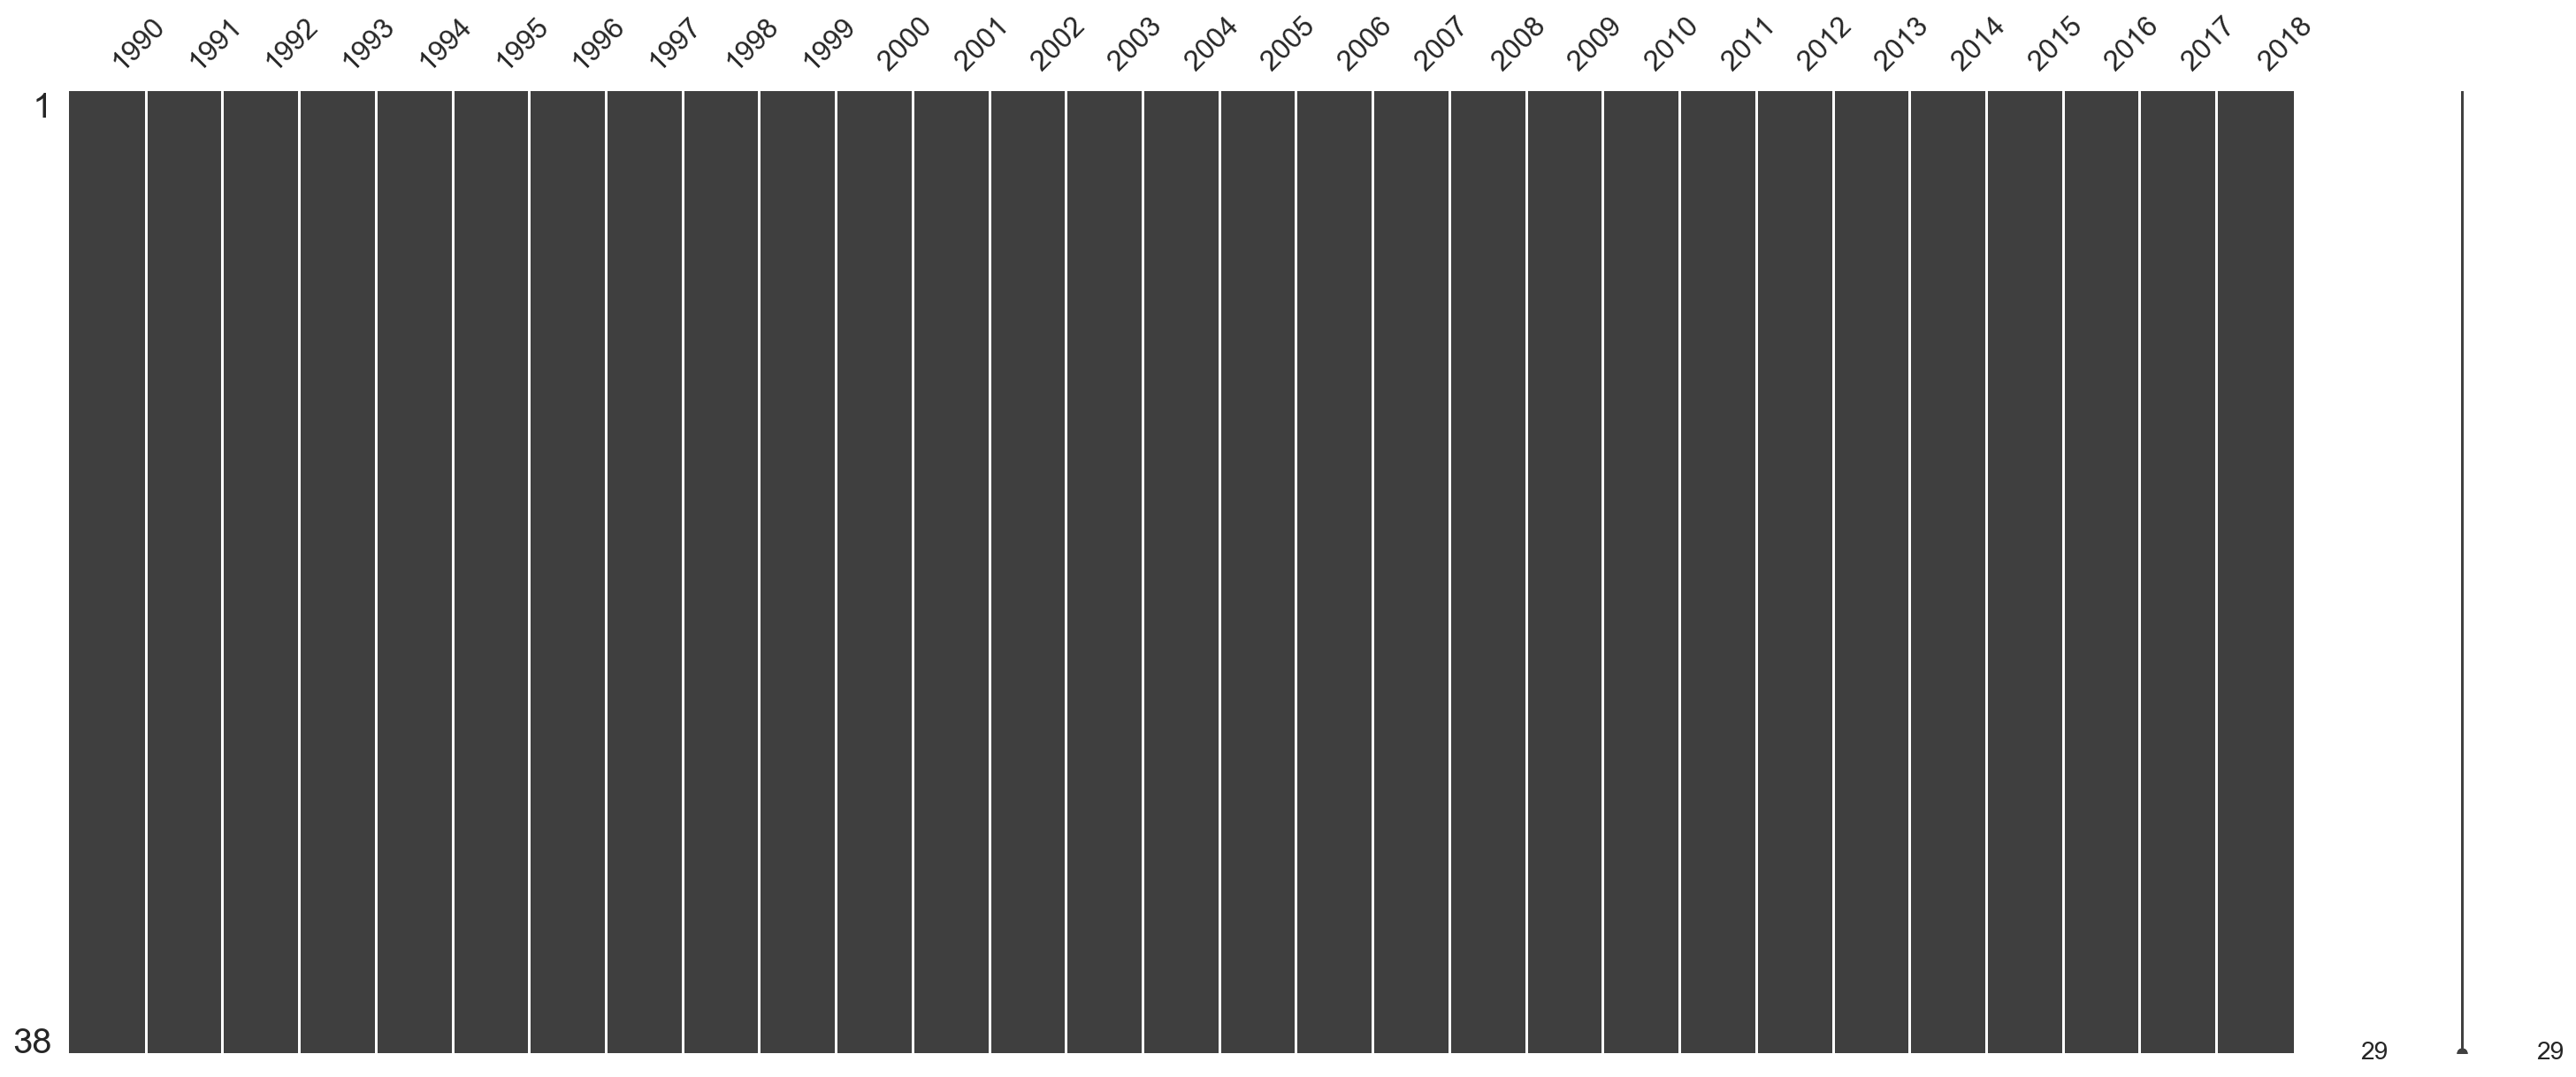

In [10]:
# 재확인
msno.matrix(df1)

In [11]:
df1.isnull()

1990   1991   1992  \
분류(1)                분류(2)             분류(3)                               
총배출량                 소계                소계            False  False  False   
순배출량                 소계                소계            False  False  False   
1. 에너지               소계                소계            False  False  False   
                     A. 연료연소           소계            False  False  False   
                                       1. 에너지산업      False  False  False   
                                       2. 제조업 및 건설업  False  False  False   
                                       3. 수송         False  False  False   
                                       4. 기타         False  False  False   
                                       5. 미분류        False  False  False   
                     B. 탈루             소계            False  False  False   
                                       1. 고체연료       False  False  False   
                                       2. 석유 및 천연가스  False  False  False   
2. 산업공정              소계                소계            False  False  False   
                     A. 광물산업           소계            False  False  False   
                     B. 화학산업           소계            False  False  False   
                     C. 금속산업           소계            False  False  False   
                     D. 기타산업           소계            False  False  False   
                     E. 할로카본 및 육불화황 생산 소계            False  False  False   
                     F. 할로카본 및 육불화황 소비 소계            False  False  False   
4. 농업                소계                소계            False  False  False   
                     A. 장내발효           소계            False  False  False   
                     B. 가축 분뇨처리        소계            False  False  False   
                     C. 벼재배            소계            False  False  False   
                     D. 농경지토양          소계            False  False  False   
                     E. 사바나 소각         소계            False  False  False   
                     F. 작물잔사소각         소계            False  False  False   
5. 토지이용, 토지이용변화 및 임업 소계                소계            False  False  False   
                     A. 산림지            소계            False  False  False   
                     B. 농경지            소계            False  False  False   
                     C. 초지             소계            False  False  False   
                     D. 습지             소계            False  False  False   
                     E. 정주지            소계            False  False  False   
                     F. 기타 토지          소계            False  False  False   
6. 폐기물               소계                소계            False  False  False   
                     A. 폐기물매립          소계            False  False  False   
                     B. 하폐수처리          소계            False  False  False   
                     C. 폐기물 소각         소계            False  False  False   
                     D. 기타             소계            False  False  False   

                                                      1993   1994   1995  \
분류(1)                분류(2)             분류(3)                               
총배출량                 소계                소계            False  False  False   
순배출량                 소계                소계            False  False  False   
1. 에너지               소계                소계            False  False  False   
                     A. 연료연소           소계            False  False  False   
                                       1. 에너지산업      False  False  False   
                                       2. 제조업 및 건설업  False  False  False   
                                       3. 수송         False  False  False   
                                       4. 기타         False  False  False   
                                       5. 미분류        False  False  False   
                     B. 탈루             소계            False  False  False   
                                       1. 고체연료       False  False  False   
                         

In [12]:
# 데이터 특성 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38 entries, ('총배출량', '소계', '소계') to ('6. 폐기물', 'D. 기타', '소계')
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    38 non-null     object
 1   1991    38 non-null     object
 2   1992    38 non-null     object
 3   1993    38 non-null     object
 4   1994    38 non-null     object
 5   1995    38 non-null     object
 6   1996    38 non-null     object
 7   1997    38 non-null     object
 8   1998    38 non-null     object
 9   1999    38 non-null     object
 10  2000    38 non-null     object
 11  2001    38 non-null     object
 12  2002    38 non-null     object
 13  2003    38 non-null     object
 14  2004    38 non-null     object
 15  2005    38 non-null     object
 16  2006    38 non-null     object
 17  2007    38 non-null     object
 18  2008    38 non-null     object
 19  2009    38 non-null     object
 20  2010    38 non-null     object
 21  2011    38 non-null   

In [13]:
# 형변환
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38 entries, ('총배출량', '소계', '소계') to ('6. 폐기물', 'D. 기타', '소계')
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    35 non-null     float64
 1   1991    35 non-null     float64
 2   1992    35 non-null     float64
 3   1993    35 non-null     float64
 4   1994    35 non-null     float64
 5   1995    35 non-null     float64
 6   1996    35 non-null     float64
 7   1997    35 non-null     float64
 8   1998    35 non-null     float64
 9   1999    35 non-null     float64
 10  2000    35 non-null     float64
 11  2001    35 non-null     float64
 12  2002    35 non-null     float64
 13  2003    35 non-null     float64
 14  2004    35 non-null     float64
 15  2005    35 non-null     float64
 16  2006    35 non-null     float64
 17  2007    35 non-null     float64
 18  2008    35 non-null     float64
 19  2009    35 non-null     float64
 20  2010    35 non-null     float64
 21 

In [15]:
df1.columns.values

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], dtype=object)

In [16]:
df1.index.values

array([('총배출량', '소계', '소계'), ('순배출량', '소계', '소계'), ('1. 에너지', '소계', '소계'),
       ('1. 에너지', 'A. 연료연소', '소계'), ('1. 에너지', 'A. 연료연소', '1. 에너지산업'),
       ('1. 에너지', 'A. 연료연소', '2. 제조업 및 건설업'),
       ('1. 에너지', 'A. 연료연소', '3. 수송'), ('1. 에너지', 'A. 연료연소', '4. 기타'),
       ('1. 에너지', 'A. 연료연소', '5. 미분류'), ('1. 에너지', 'B. 탈루', '소계'),
       ('1. 에너지', 'B. 탈루', '1. 고체연료'),
       ('1. 에너지', 'B. 탈루', '2. 석유 및 천연가스'), ('2. 산업공정', '소계', '소계'),
       ('2. 산업공정', 'A. 광물산업', '소계'), ('2. 산업공정', 'B. 화학산업', '소계'),
       ('2. 산업공정', 'C. 금속산업', '소계'), ('2. 산업공정', 'D. 기타산업', '소계'),
       ('2. 산업공정', 'E. 할로카본 및 육불화황 생산', '소계'),
       ('2. 산업공정', 'F. 할로카본 및 육불화황 소비', '소계'), ('4. 농업', '소계', '소계'),
       ('4. 농업', 'A. 장내발효', '소계'), ('4. 농업', 'B. 가축 분뇨처리', '소계'),
       ('4. 농업', 'C. 벼재배', '소계'), ('4. 농업', 'D. 농경지토양', '소계'),
       ('4. 농업', 'E. 사바나 소각', '소계'), ('4. 농업', 'F. 작물잔사소각', '소계'),
       ('5. 토지이용, 토지이용변화 및 임업', '소계', '소계'),
       ('5. 토지이용, 토지이용변화 및 임업', 'A. 산림지', '소계'),
       ('5. 토지이용, 토지이

In [17]:
# 필요한 인덱스만 추출
df_ghg = df1.loc[[('총배출량', '소계', '소계'), ('순배출량', '소계', '소계'), ('1. 에너지', '소계', '소계'), ('2. 산업공정', '소계', '소계'), ('4. 농업', '소계', '소계'), ('5. 토지이용, 토지이용변화 및 임업', '소계', '소계'), ('6. 폐기물', '소계', '소계')]]
df_ghg

,,,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
분류(1),분류(2),분류(3),,,,,,,,,,,,,,,,,,,,,
총배출량,소계,소계,292.190,315.460,343.482,378.674,403.690,433.892,470.463,502.115,431.532,469.519,...,597.983,656.323,684.930,688.308,697.384,691.933,692.515,693.535,709.750,727.633
순배출량,소계,소계,254.404,281.908,310.859,347.853,370.778,402.970,436.106,463.071,383.932,414.154,...,541.599,602.477,632.324,641.311,654.849,648.650,648.153,647.975,668.262,686.348
1. 에너지,소계,소계,240.399,258.240,279.147,308.655,327.988,352.171,385.815,411.871,351.654,382.291,...,513.055,566.120,595.093,596.471,605.014,597.373,600.696,602.661,615.658,632.376
2. 산업공정,소계,소계,20.444,24.350,29.954,34.422,38.742,43.146,44.770,49.643,40.764,48.422,...,47.795,52.951,52.881,54.420,54.820,57.539,54.281,53.232,55.929,56.974
4. 농업,소계,소계,20.972,21.238,21.641,22.108,22.554,22.821,23.334,23.342,23.067,21.942,...,21.655,22.070,21.121,21.470,21.348,21.374,20.984,20.810,20.958,21.191
"5. 토지이용, 토지이용변화 및 임업",소계,소계,-37.786,-33.552,-32.623,-30.821,-32.912,-30.923,-34.358,-39.044,-47.599,-55.365,...,-56.383,-53.846,-52.606,-46.997,-42.535,-43.282,-44.361,-45.560,-41.488,-41.285
6. 폐기물,소계,소계,10.375,11.632,12.739,13.490,14.406,15.755,16.544,17.260,16.046,16.864,...,15.478,15.181,15.836,15.946,16.203,15.645,16.553,16.832,17.204,17.092


In [18]:
df_ghg.index.values

array([('총배출량', '소계', '소계'), ('순배출량', '소계', '소계'), ('1. 에너지', '소계', '소계'),
       ('2. 산업공정', '소계', '소계'), ('4. 농업', '소계', '소계'),
       ('5. 토지이용, 토지이용변화 및 임업', '소계', '소계'), ('6. 폐기물', '소계', '소계')],
      dtype=object)

In [19]:
# 알아보기 쉽게 인덱스 수정
df_ghg.index = ['총배출량', '순배출량', '에너지', '산업공정', '농업', 'LULUCF', '폐기물']
df_ghg

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
총배출량,292.190,315.460,343.482,378.674,403.690,433.892,470.463,502.115,431.532,469.519,...,597.983,656.323,684.930,688.308,697.384,691.933,692.515,693.535,709.750,727.633
순배출량,254.404,281.908,310.859,347.853,370.778,402.970,436.106,463.071,383.932,414.154,...,541.599,602.477,632.324,641.311,654.849,648.650,648.153,647.975,668.262,686.348
에너지,240.399,258.240,279.147,308.655,327.988,352.171,385.815,411.871,351.654,382.291,...,513.055,566.120,595.093,596.471,605.014,597.373,600.696,602.661,615.658,632.376
산업공정,20.444,24.350,29.954,34.422,38.742,43.146,44.770,49.643,40.764,48.422,...,47.795,52.951,52.881,54.420,54.820,57.539,54.281,53.232,55.929,56.974
농업,20.972,21.238,21.641,22.108,22.554,22.821,23.334,23.342,23.067,21.942,...,21.655,22.070,21.121,21.470,21.348,21.374,20.984,20.810,20.958,21.191
LULUCF,-37.786,-33.552,-32.623,-30.821,-32.912,-30.923,-34.358,-39.044,-47.599,-55.365,...,-56.383,-53.846,-52.606,-46.997,-42.535,-43.282,-44.361,-45.560,-41.488,-41.285
폐기물,10.375,11.632,12.739,13.490,14.406,15.755,16.544,17.260,16.046,16.864,...,15.478,15.181,15.836,15.946,16.203,15.645,16.553,16.832,17.204,17.092


<AxesSubplot:>

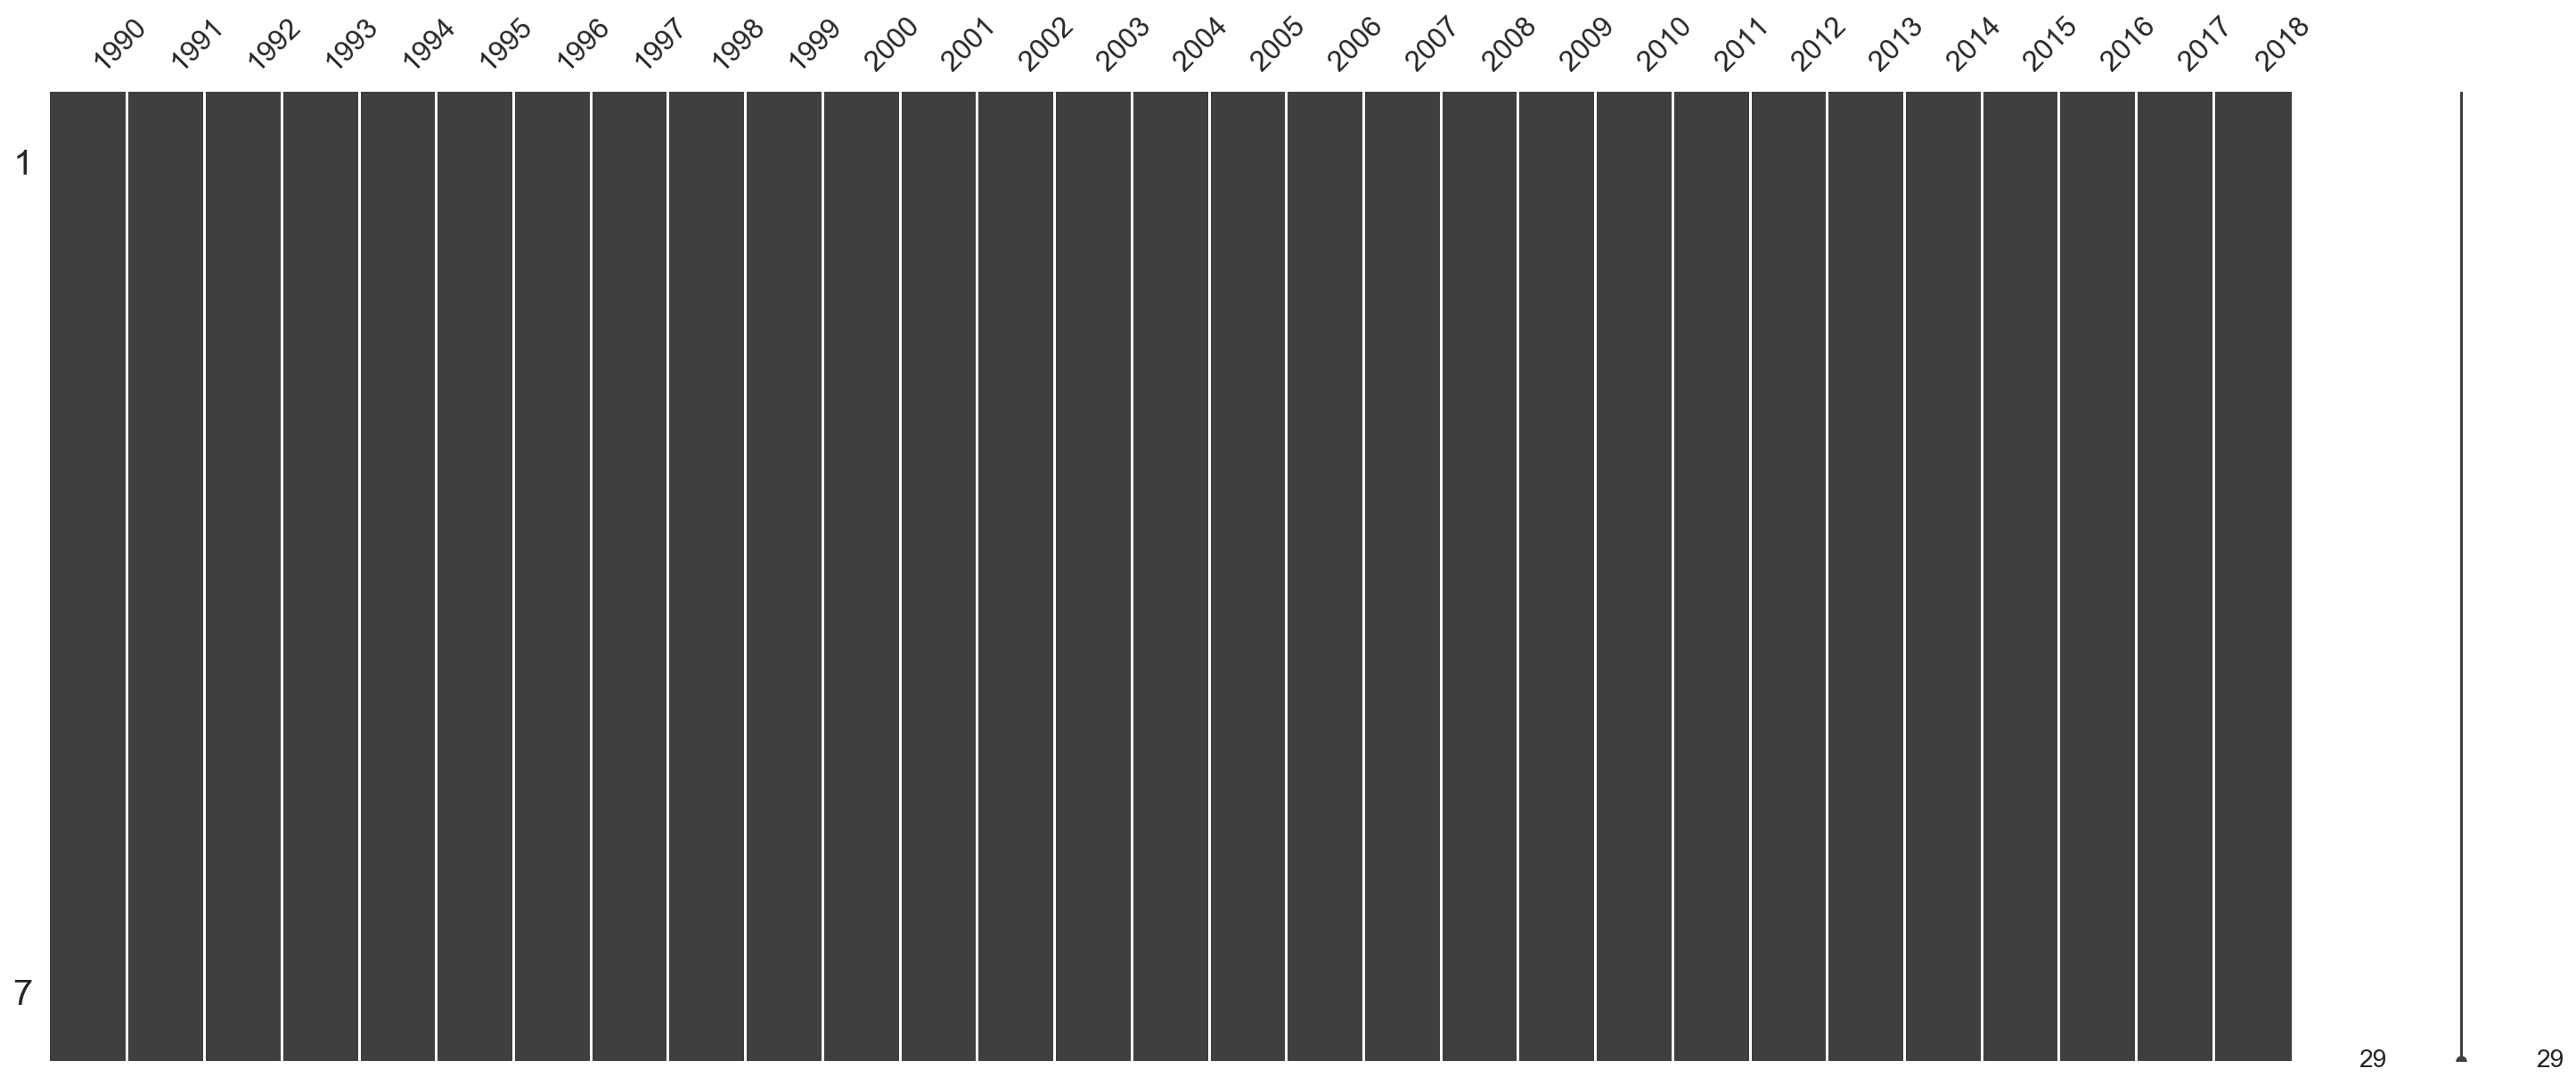

In [20]:
# 혹시 모르니 추출 후 재확인
msno.matrix(df_ghg)

In [21]:
df_ghg.isnull()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
총배출량,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
순배출량,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
에너지,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
산업공정,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
농업,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LULUCF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
폐기물,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_ghg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 총배출량 to 폐기물
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    7 non-null      float64
 1   1991    7 non-null      float64
 2   1992    7 non-null      float64
 3   1993    7 non-null      float64
 4   1994    7 non-null      float64
 5   1995    7 non-null      float64
 6   1996    7 non-null      float64
 7   1997    7 non-null      float64
 8   1998    7 non-null      float64
 9   1999    7 non-null      float64
 10  2000    7 non-null      float64
 11  2001    7 non-null      float64
 12  2002    7 non-null      float64
 13  2003    7 non-null      float64
 14  2004    7 non-null      float64
 15  2005    7 non-null      float64
 16  2006    7 non-null      float64
 17  2007    7 non-null      float64
 18  2008    7 non-null      float64
 19  2009    7 non-null      float64
 20  2010    7 non-null      float64
 21  2011    7 non-null      float64
 22  2012  

In [23]:
df_ghg.to_csv('ghg0210.csv')

## 2. 국가_온실가스_배출량_주요_지표.csv

In [24]:
# multiindex 로 자료 불러오기
# skipinitialspace: True일때, 구분문자 이후의 공백을 생략

df2 = pd.read_csv('./datas/ghg_ind.csv', encoding='euc-kr', index_col=[0,1], skipinitialspace=True)
df2

1990     1991     1992     1993     1994  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)        6.816    7.286    7.851    8.568    9.043   
      1인당 배출량 증감률 (%)             0.000    6.900    7.757    9.132    5.539   
      GDP당 배출량 (t CO2eq./10억원)  696.488  627.039  642.888  663.149  646.991   
      GDP당 국가 배출량 증감률 (%)         0.000   -2.540    2.528    3.152   -2.437   

                                   1995     1996     1997     1998     1999  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)        9.622   10.334   10.927    9.323   10.072   
      1인당 배출량 증감률 (%)             6.406    7.400    5.732  -14.675    8.032   
      GDP당 배출량 (t CO2eq./10억원)  634.401  637.564  640.910  580.597  566.721   
      GDP당 국가 배출량 증감률 (%)        -1.946    0.499    0.525   -9.411   -2.390   

                                ...     2009     2010     2011     2012  \
총계(1) 항목                        ...                                       
총계    1인당 배출량 (t CO2eq./명)      ...   12.128   13.245   13.716   13.711   
      1인당 배출량 증감률 (%)           ...    0.178    9.211    3.559   -0.034   
      GDP당 배출량 (t CO2eq./10억원)  ...  447.684  460.055  463.041  454.408   
      GDP당 국가 배출량 증감률 (%)       ...   -0.097    2.763    0.649   -1.864   

                                   2013     2014     2015     2016     2017  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)       13.829   13.635   13.575   13.541   13.819   
      1인당 배출량 증감률 (%)             0.858   -1.403   -0.442   -0.249    2.051   
      GDP당 배출량 (t CO2eq./10억원)  446.276  429.048  417.676  406.317  403.081   
      GDP당 국가 배출량 증감률 (%)        -1.790   -3.860   -2.651   -2.719   -0.796   

                                   2018  
총계(1) 항목                                 
총계    1인당 배출량 (t CO2eq./명)       14.100  
      1인당 배출량 증감률 (%)             2.034  
      GDP당 배출량 (t CO2eq./10억원)  401.562  
      GDP당 국가 배출량 증감률 (%)        -0.377  

[4 rows x 29 columns]

In [25]:
df2.head()

1990     1991     1992     1993     1994  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)        6.816    7.286    7.851    8.568    9.043   
      1인당 배출량 증감률 (%)             0.000    6.900    7.757    9.132    5.539   
      GDP당 배출량 (t CO2eq./10억원)  696.488  627.039  642.888  663.149  646.991   
      GDP당 국가 배출량 증감률 (%)         0.000   -2.540    2.528    3.152   -2.437   

                                   1995     1996     1997     1998     1999  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)        9.622   10.334   10.927    9.323   10.072   
      1인당 배출량 증감률 (%)             6.406    7.400    5.732  -14.675    8.032   
      GDP당 배출량 (t CO2eq./10억원)  634.401  637.564  640.910  580.597  566.721   
      GDP당 국가 배출량 증감률 (%)        -1.946    0.499    0.525   -9.411   -2.390   

                                ...     2009     2010     2011     2012  \
총계(1) 항목                        ...                                       
총계    1인당 배출량 (t CO2eq./명)      ...   12.128   13.245   13.716   13.711   
      1인당 배출량 증감률 (%)           ...    0.178    9.211    3.559   -0.034   
      GDP당 배출량 (t CO2eq./10억원)  ...  447.684  460.055  463.041  454.408   
      GDP당 국가 배출량 증감률 (%)       ...   -0.097    2.763    0.649   -1.864   

                                   2013     2014     2015     2016     2017  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)       13.829   13.635   13.575   13.541   13.819   
      1인당 배출량 증감률 (%)             0.858   -1.403   -0.442   -0.249    2.051   
      GDP당 배출량 (t CO2eq./10억원)  446.276  429.048  417.676  406.317  403.081   
      GDP당 국가 배출량 증감률 (%)        -1.790   -3.860   -2.651   -2.719   -0.796   

                                   2018  
총계(1) 항목                                 
총계    1인당 배출량 (t CO2eq./명)       14.100  
      1인당 배출량 증감률 (%)             2.034  
      GDP당 배출량 (t CO2eq./10억원)  401.562  
      GDP당 국가 배출량 증감률 (%)        -0.377  

[4 rows x 29 columns]

In [26]:
df2.tail()

1990     1991     1992     1993     1994  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)        6.816    7.286    7.851    8.568    9.043   
      1인당 배출량 증감률 (%)             0.000    6.900    7.757    9.132    5.539   
      GDP당 배출량 (t CO2eq./10억원)  696.488  627.039  642.888  663.149  646.991   
      GDP당 국가 배출량 증감률 (%)         0.000   -2.540    2.528    3.152   -2.437   

                                   1995     1996     1997     1998     1999  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)        9.622   10.334   10.927    9.323   10.072   
      1인당 배출량 증감률 (%)             6.406    7.400    5.732  -14.675    8.032   
      GDP당 배출량 (t CO2eq./10억원)  634.401  637.564  640.910  580.597  566.721   
      GDP당 국가 배출량 증감률 (%)        -1.946    0.499    0.525   -9.411   -2.390   

                                ...     2009     2010     2011     2012  \
총계(1) 항목                        ...                                       
총계    1인당 배출량 (t CO2eq./명)      ...   12.128   13.245   13.716   13.711   
      1인당 배출량 증감률 (%)           ...    0.178    9.211    3.559   -0.034   
      GDP당 배출량 (t CO2eq./10억원)  ...  447.684  460.055  463.041  454.408   
      GDP당 국가 배출량 증감률 (%)       ...   -0.097    2.763    0.649   -1.864   

                                   2013     2014     2015     2016     2017  \
총계(1) 항목                                                                      
총계    1인당 배출량 (t CO2eq./명)       13.829   13.635   13.575   13.541   13.819   
      1인당 배출량 증감률 (%)             0.858   -1.403   -0.442   -0.249    2.051   
      GDP당 배출량 (t CO2eq./10억원)  446.276  429.048  417.676  406.317  403.081   
      GDP당 국가 배출량 증감률 (%)        -1.790   -3.860   -2.651   -2.719   -0.796   

                                   2018  
총계(1) 항목                                 
총계    1인당 배출량 (t CO2eq./명)       14.100  
      1인당 배출량 증감률 (%)             2.034  
      GDP당 배출량 (t CO2eq./10억원)  401.562  
      GDP당 국가 배출량 증감률 (%)        -0.377  

[4 rows x 29 columns]

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, ('총계', '1인당 배출량 (t CO2eq./명)') to ('총계', 'GDP당 국가 배출량 증감률 (%)')
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4 non-null      float64
 1   1991    4 non-null      float64
 2   1992    4 non-null      float64
 3   1993    4 non-null      float64
 4   1994    4 non-null      float64
 5   1995    4 non-null      float64
 6   1996    4 non-null      float64
 7   1997    4 non-null      float64
 8   1998    4 non-null      float64
 9   1999    4 non-null      float64
 10  2000    4 non-null      float64
 11  2001    4 non-null      float64
 12  2002    4 non-null      float64
 13  2003    4 non-null      float64
 14  2004    4 non-null      float64
 15  2005    4 non-null      float64
 16  2006    4 non-null      float64
 17  2007    4 non-null      float64
 18  2008    4 non-null      float64
 19  2009    4 non-null      float64
 20  2010    4 non-null     

<AxesSubplot:>

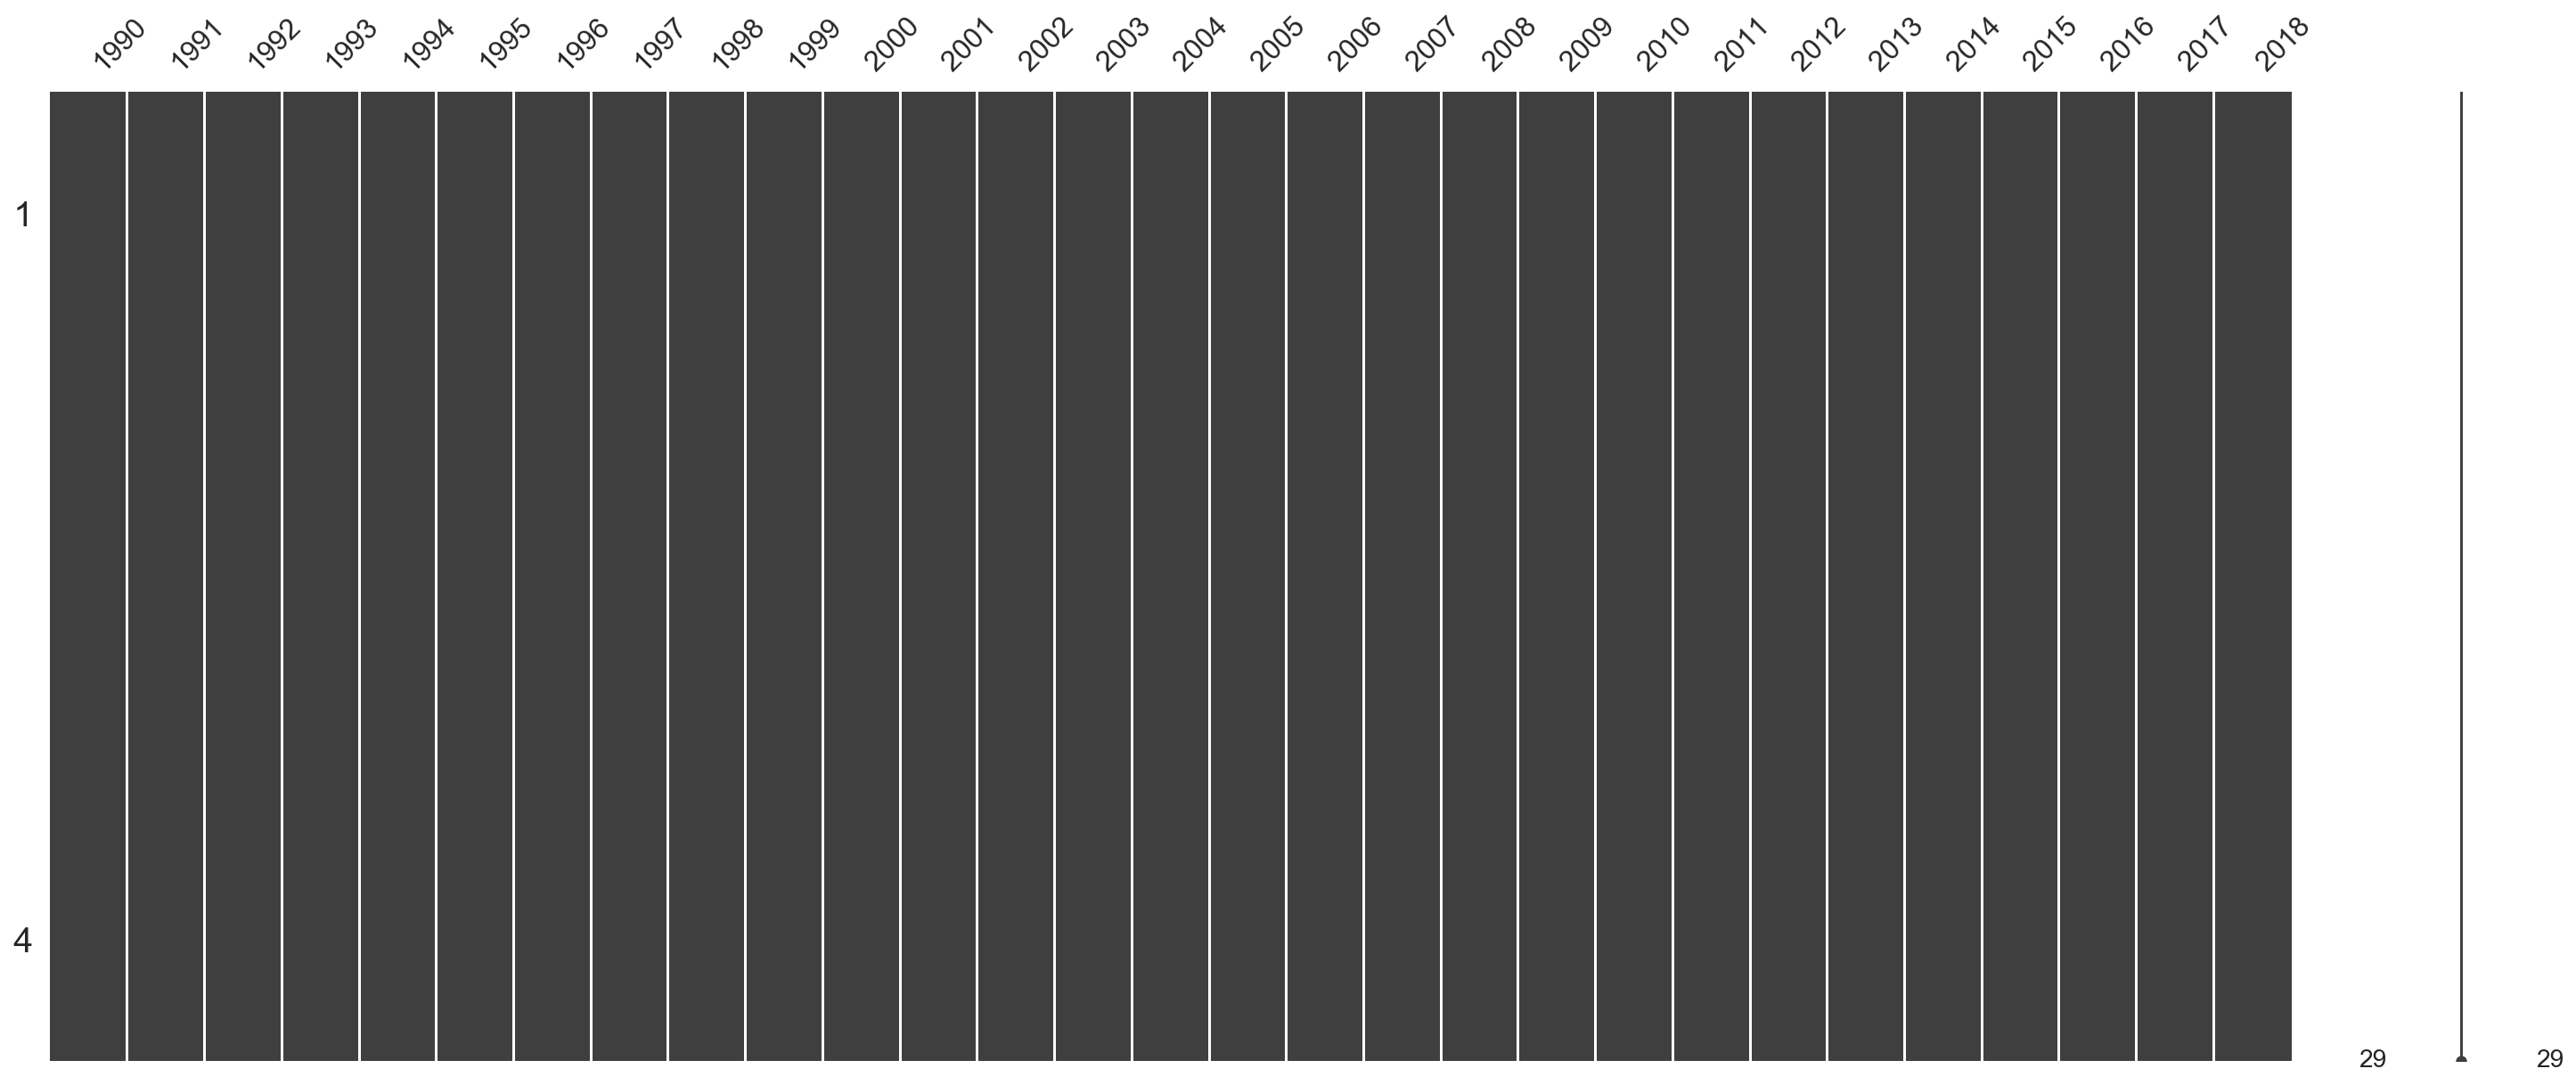

In [28]:
msno.matrix(df2)

In [29]:
df2.isnull()

1990   1991   1992   1993   1994   1995  \
총계(1) 항목                                                                   
총계    1인당 배출량 (t CO2eq./명)      False  False  False  False  False  False   
      1인당 배출량 증감률 (%)           False  False  False  False  False  False   
      GDP당 배출량 (t CO2eq./10억원)  False  False  False  False  False  False   
      GDP당 국가 배출량 증감률 (%)       False  False  False  False  False  False   

                                 1996   1997   1998   1999  ...   2009   2010  \
총계(1) 항목                                                    ...                 
총계    1인당 배출량 (t CO2eq./명)      False  False  False  False  ...  False  False   
      1인당 배출량 증감률 (%)           False  False  False  False  ...  False  False   
      GDP당 배출량 (t CO2eq./10억원)  False  False  False  False  ...  False  False   
      GDP당 국가 배출량 증감률 (%)       False  False  False  False  ...  False  False   

                                 2011   2012   2013   2014   2015   2016  \
총계(1) 항목                                                                   
총계    1인당 배출량 (t CO2eq./명)      False  False  False  False  False  False   
      1인당 배출량 증감률 (%)           False  False  False  False  False  False   
      GDP당 배출량 (t CO2eq./10억원)  False  False  False  False  False  False   
      GDP당 국가 배출량 증감률 (%)       False  False  False  False  False  False   

                                 2017   2018  
총계(1) 항목                                      
총계    1인당 배출량 (t CO2eq./명)      False  False  
      1인당 배출량 증감률 (%)           False  False  
      GDP당 배출량 (t CO2eq./10억원)  False  False  
      GDP당 국가 배출량 증감률 (%)       False  False  

[4 rows x 29 columns]

In [30]:
df2.columns.values

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], dtype=object)

In [31]:
df2.index.values

array([('총계', '1인당 배출량 (t CO2eq./명)'), ('총계', '1인당 배출량 증감률 (%)'),
       ('총계', 'GDP당 배출량 (t CO2eq./10억원)'), ('총계', 'GDP당 국가 배출량 증감률 (%)')],
      dtype=object)

In [32]:
# 복사본 만들기
df_ghg_ind = df2.copy()

In [33]:
df_ghg_ind.index = ['1인당 배출량', '1인당 배출량 증감률', 'GDP당 배출량', 'GDP당 배출량 증감률']
df_ghg_ind

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1인당 배출량,6.816,7.286,7.851,8.568,9.043,9.622,10.334,10.927,9.323,10.072,...,12.128,13.245,13.716,13.711,13.829,13.635,13.575,13.541,13.819,14.100
1인당 배출량 증감률,0.000,6.900,7.757,9.132,5.539,6.406,7.400,5.732,-14.675,8.032,...,0.178,9.211,3.559,-0.034,0.858,-1.403,-0.442,-0.249,2.051,2.034
GDP당 배출량,696.488,627.039,642.888,663.149,646.991,634.401,637.564,640.910,580.597,566.721,...,447.684,460.055,463.041,454.408,446.276,429.048,417.676,406.317,403.081,401.562
GDP당 배출량 증감률,0.000,-2.540,2.528,3.152,-2.437,-1.946,0.499,0.525,-9.411,-2.390,...,-0.097,2.763,0.649,-1.864,-1.790,-3.860,-2.651,-2.719,-0.796,-0.377


In [34]:
df_ghg_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1인당 배출량 to GDP당 배출량 증감률
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4 non-null      float64
 1   1991    4 non-null      float64
 2   1992    4 non-null      float64
 3   1993    4 non-null      float64
 4   1994    4 non-null      float64
 5   1995    4 non-null      float64
 6   1996    4 non-null      float64
 7   1997    4 non-null      float64
 8   1998    4 non-null      float64
 9   1999    4 non-null      float64
 10  2000    4 non-null      float64
 11  2001    4 non-null      float64
 12  2002    4 non-null      float64
 13  2003    4 non-null      float64
 14  2004    4 non-null      float64
 15  2005    4 non-null      float64
 16  2006    4 non-null      float64
 17  2007    4 non-null      float64
 18  2008    4 non-null      float64
 19  2009    4 non-null      float64
 20  2010    4 non-null      float64
 21  2011    4 non-null      float64

In [35]:
df_ghg_ind.to_csv('ghg_ind0210.csv')

## 3. 폐기물_처리현황_생활계폐기물.csv

전국의 생활계폐기물의 1년 단위 발생 및 처리현황 데이터

In [36]:
# multiindex 로 자료 불러오기
# skipinitialspace: True일때, 구분문자 이후의 공백을 생략

# 한번에 csv파일 다운로드하니까 파일이 깨져서, 3년치씩 나눠서 다운받은 후 합침

df3 = pd.DataFrame( )

for i in range(1, 9):
    df = pd.read_csv('./datas/waste/{}.csv'.format(i), encoding='euc-kr',
                     header=[0,1,2,3], index_col=[0,1,2],
                     skipinitialspace=True)
    new_df = pd.concat([df3,df], axis=1, sort=False)
    df3 = new_df
    
df3

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
강원 발생량 소계    1727.0        914.0    394.0   205.0    64.0    34.0    64.0   
   처리량 기타       NaN          NaN      NaN     NaN     NaN     NaN     NaN   
       매립    1421.0        855.0    390.0   183.0    50.0    32.0    54.0   
       소각      57.0         57.0      2.0    22.0    14.0     2.0    10.0   
       재활용    249.0          2.0      2.0     0.0     0.0     0.0     0.0   
...             ...          ...      ...     ...     ...     ...     ...   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타       NaN          NaN      NaN     NaN     NaN     NaN     NaN   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
강원 발생량 소계    153.0   567.0   210.0  ...         13.3   0.6    39.8   18.5   
   처리량 기타      NaN     NaN     NaN  ...          NaN   NaN     NaN    NaN   
       매립    146.0   566.0   210.0  ...          0.0   0.0     0.0    0.0   
       소각      7.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용     0.0     1.0     0.0  ...         13.3   0.6    39.8   18.5   
...            ...     ...     ...  ...          ...   ...     ...    ...   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      NaN     NaN     NaN  ...          NaN   NaN     NaN    NaN   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
강원 발생량 소계    37.9   12.3   0.9    53.1    33.6       453.6  
   처리량 기타     NaN    NaN   NaN     NaN     NaN         NaN  
       매립     0.0    0.0   0.0     0.0     0.0        23.0  
       소각     0.0    0.0   0.0     0.0     0.0        23.7  
       재활용   37.9   12.3   0.9    53.1    33.6       406.9  
...           ...    ...   ...     ...     ...         ...  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     NaN    NaN   NaN     NaN     NaN         NaN  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[89 rows x 605 columns]

In [37]:
df3.head()

시도별(1)        1996                                                       \
시도별(1)          총계 종량제방식에의한혼합배출                                           
시도별(1)          소계          가연성                                           
시도별(1)          소계           소계 음식물 채소류    종이류   나무류 고무피혁류 플라스틱류     기타   
강원 발생량 소계   1727.0        914.0   394.0  205.0  64.0  34.0  64.0  153.0   
   처리량 기타      NaN          NaN     NaN    NaN   NaN   NaN   NaN    NaN   
       매립   1421.0        855.0   390.0  183.0  50.0  32.0  54.0  146.0   
       소각     57.0         57.0     2.0   22.0  14.0   2.0  10.0    7.0   
       재활용   249.0          2.0     2.0    0.0   0.0   0.0   0.0    0.0   

시도별(1)                    ...         2018                                    \
시도별(1)                    ... 재활용가능자원 분리배출                                     
시도별(1)        불연성         ...          윤활유  형광등   고철류    의류 영농폐기물   가구류 폐식용유   
시도별(1)         소계    연탄재  ...           소계   소계    소계    소계    소계    소계   소계   
강원 발생량 소계   567.0  210.0  ...         13.3  0.6  39.8  18.5  37.9  12.3  0.9   
   처리량 기타     NaN    NaN  ...          NaN  NaN   NaN   NaN   NaN   NaN  NaN   
       매립   566.0  210.0  ...          0.0  0.0   0.0   0.0   0.0   0.0  0.0   
       소각     0.0    0.0  ...          0.0  0.0   0.0   0.0   0.0   0.0  0.0   
       재활용    1.0    0.0  ...         13.3  0.6  39.8  18.5  37.9  12.3  0.9   

시도별(1)                               
시도별(1)                  음식물류폐기물분리배출  
시도별(1)     재활용잔재물    기타          소계  
시도별(1)         소계    소계          소계  
강원 발생량 소계    53.1  33.6       453.6  
   처리량 기타     NaN   NaN         NaN  
       매립     0.0   0.0        23.0  
       소각     0.0   0.0        23.7  
       재활용   53.1  33.6       406.9  

[5 rows x 605 columns]

In [38]:
df3.tail()

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타       NaN          NaN      NaN     NaN     NaN     NaN     NaN   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      NaN     NaN     NaN  ...          NaN   NaN     NaN    NaN   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     NaN    NaN   NaN     NaN     NaN         NaN  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 605 columns]

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 89 entries, ('강원', '발생량', '소계') to ('합계', '처리량', '재활용')
Columns: 605 entries, ('1996', '총계', '소계', '소계') to ('2018', '음식물류폐기물분리배출', '소계', '소계')
dtypes: float64(533), object(72)
memory usage: 422.1+ KB


<AxesSubplot:>

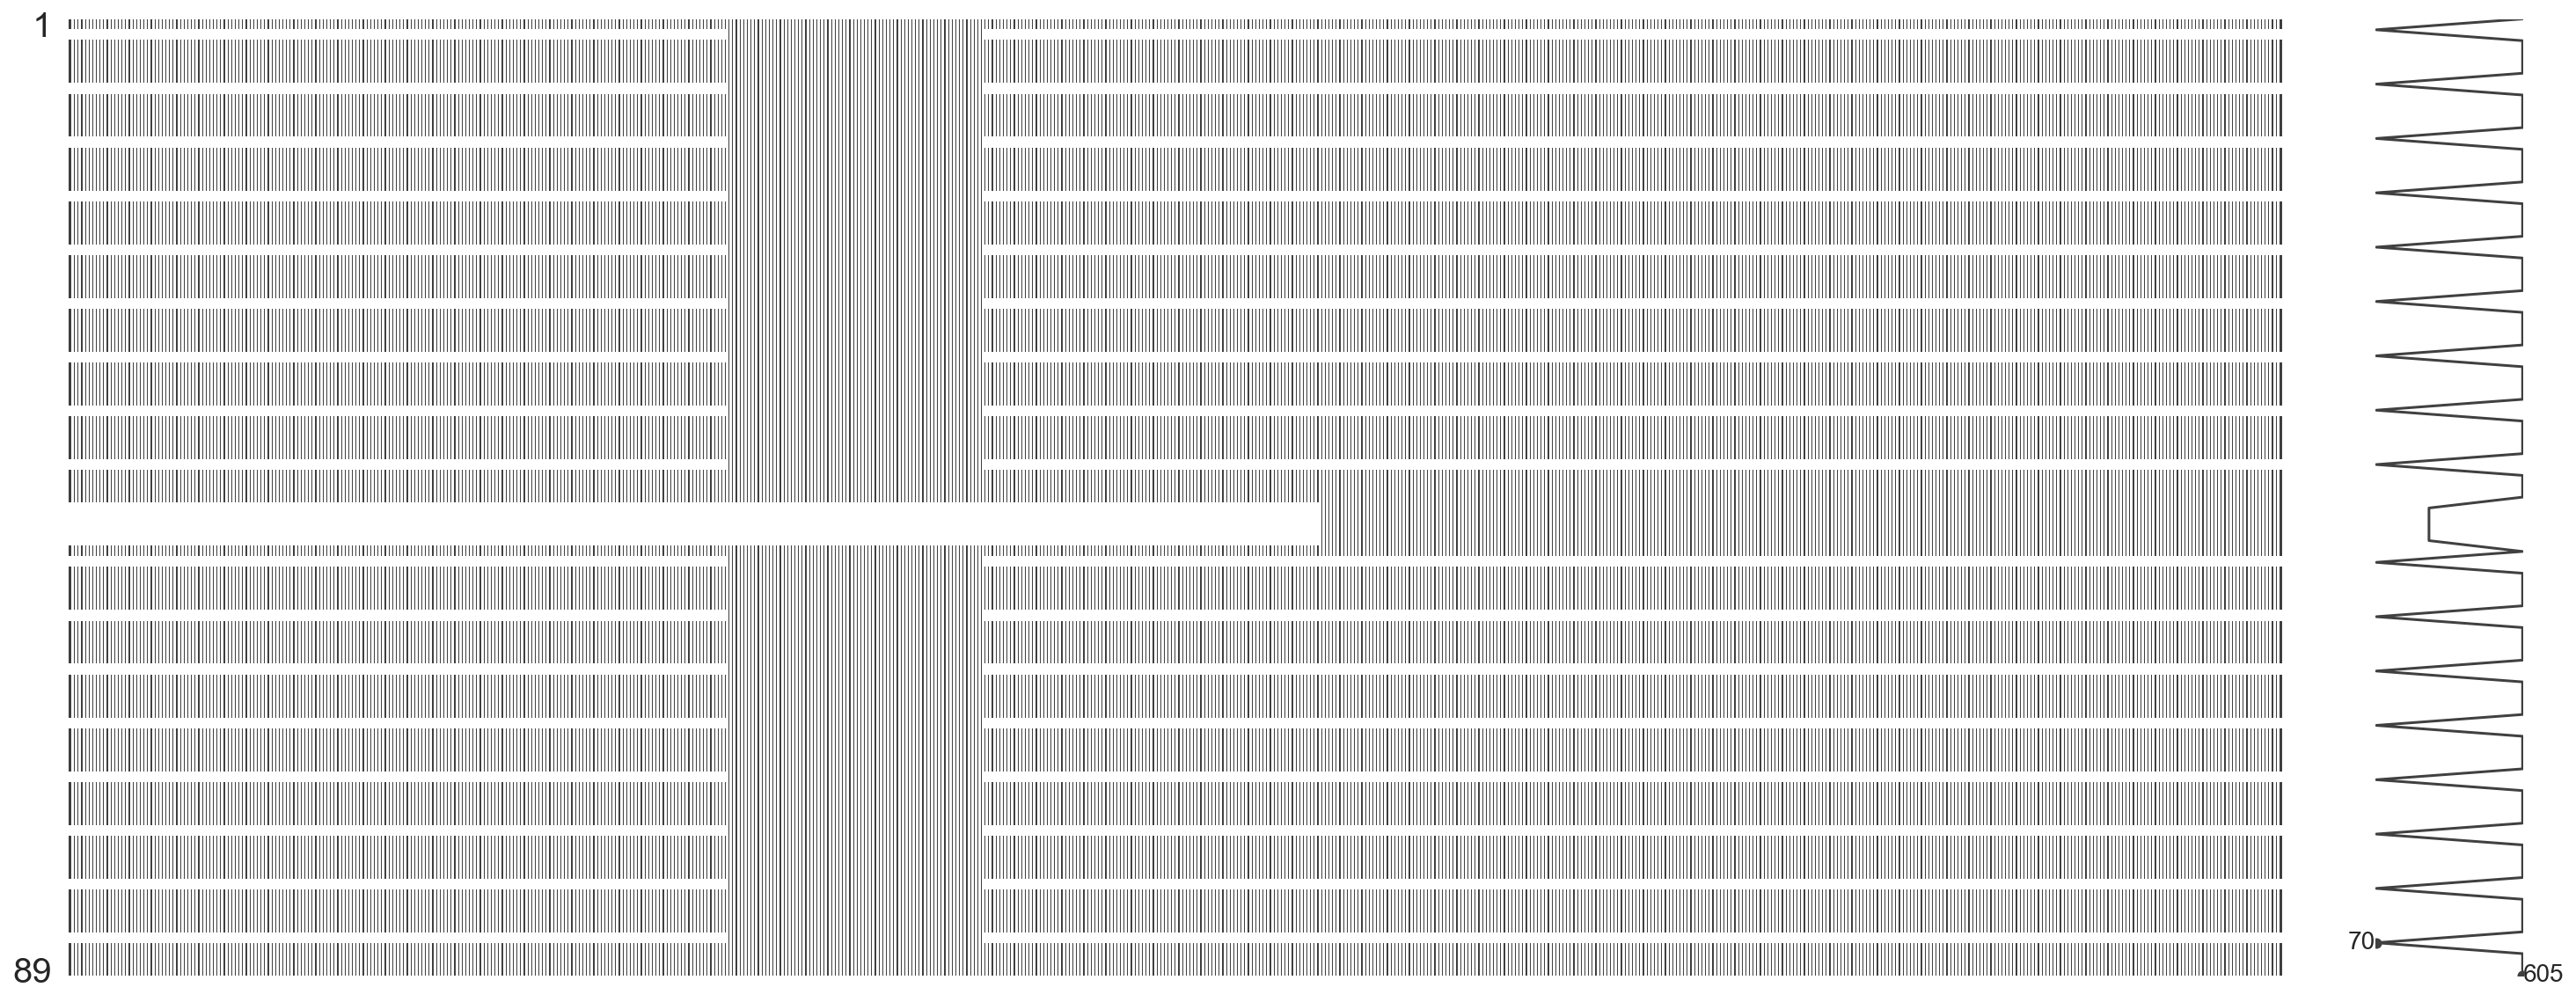

In [40]:
# 결측치 확인
msno.matrix(df3)

In [41]:
df3.isnull()

시도별(1)       1996                                                          \
시도별(1)         총계 종량제방식에의한혼합배출                                              
시도별(1)         소계          가연성                                              
시도별(1)         소계           소계 음식물 채소류    종이류    나무류  고무피혁류  플라스틱류     기타   
강원 발생량 소계   False        False   False  False  False  False  False  False   
   처리량 기타    True         True    True   True   True   True   True   True   
       매립   False        False   False  False  False  False  False  False   
       소각   False        False   False  False  False  False  False  False   
       재활용  False        False   False  False  False  False  False  False   
...           ...          ...     ...    ...    ...    ...    ...    ...   
합계 발생량 소계   False        False   False  False  False  False  False  False   
   처리량 기타    True         True    True   True   True   True   True   True   
       매 립  False        False   False  False  False  False  False  False   
       소 각  False        False   False  False  False  False  False  False   
       재활용  False        False   False  False  False  False  False  False   

시도별(1)                    ...         2018                                     \
시도별(1)                    ... 재활용가능자원 분리배출                                      
시도별(1)        불연성         ...          윤활유    형광등    고철류     의류  영농폐기물    가구류   
시도별(1)         소계    연탄재  ...           소계     소계     소계     소계     소계     소계   
강원 발생량 소계   False  False  ...        False  False  False  False  False  False   
   처리량 기타    True   True  ...         True   True   True   True   True   True   
       매립   False  False  ...        False  False  False  False  False  False   
       소각   False  False  ...        False  False  False  False  False  False   
       재활용  False  False  ...        False  False  False  False  False  False   
...           ...    ...  ...          ...    ...    ...    ...    ...    ...   
합계 발생량 소계   False  False  ...        False  False  False  False  False  False   
   처리량 기타    True   True  ...         True   True   True   True   True   True   
       매 립  False  False  ...        False  False  False  False  False  False   
       소 각  False  False  ...        False  False  False  False  False  False   
       재활용  False  False  ...        False  False  False  False  False  False   

시도별(1)                                       
시도별(1)                          음식물류폐기물분리배출  
시도별(1)       폐식용유 재활용잔재물     기타          소계  
시도별(1)         소계     소계     소계          소계  
강원 발생량 소계   False  False  False       False  
   처리량 기타    True   True   True        True  
       매립   False  False  False       False  
       소각   False  False  False       False  
       재활용  False  False  False       False  
...           ...    ...    ...         ...  
합계 발생량 소계   False  False  False       False  
   처리량 기타    True   True   True        True  
       매 립  False  False  False       False  
       소 각  False  False  False       False  
       재활용  False  False  False       False  

[89 rows x 605 columns]

In [42]:
df3.columns.values

array([('1996', '총계', '소계', '소계'), ('1996', '종량제방식에의한혼합배출', '가연성', '소계'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '소계'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '금속류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '토사류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '기타'),
       ('1996', '재활용가능자원 분리배출', '소계', '소계'),
       ('1996', '재활용가능자원 분리배출', '종이류', '소계'),
       ('1996', '재활용가능자원 분리배출', '유리병류', '소계'),
       ('1996', '재활용가능자원 분리배출', '캔류', '소계'),
       ('1996', '재활용가능자원 분리배출', '플라스틱류', '소계'),
       ('1996', '재활용가능자원 분리배출', '고철류', '소계'),
       ('1996', '재활용가능자원 분리배출', '기타', '소계'), ('1997', '총계', '소계', '소계'),
       ('1997', '종량제방식에의한혼합배출', '가연성', '소계'),
       (

In [43]:
df3.index.values

array([('강원', '발생량', '소계'), ('강원', '처리량', '기타'), ('강원', '처리량', '매립'),
       ('강원', '처리량', '소각'), ('강원', '처리량', '재활용'), ('경기', '발생량', '소계'),
       ('경기', '처리량', '기타'), ('경기', '처리량', '매립'), ('경기', '처리량', '소각'),
       ('경기', '처리량', '재활용'), ('경남', '발생량', '소계'), ('경남', '처리량', '기타'),
       ('경남', '처리량', '매립'), ('경남', '처리량', '소각'), ('경남', '처리량', '재활용'),
       ('경북', '발생량', '소계'), ('경북', '처리량', '기타'), ('경북', '처리량', '매립'),
       ('경북', '처리량', '소각'), ('경북', '처리량', '재활용'), ('광주', '발생량', '소계'),
       ('광주', '처리량', '기타'), ('광주', '처리량', '매립'), ('광주', '처리량', '소각'),
       ('광주', '처리량', '재활용'), ('대구', '발생량', '소계'), ('대구', '처리량', '기타'),
       ('대구', '처리량', '매립'), ('대구', '처리량', '소각'), ('대구', '처리량', '재활용'),
       ('대전', '발생량', '소계'), ('대전', '처리량', '기타'), ('대전', '처리량', '매립'),
       ('대전', '처리량', '소각'), ('대전', '처리량', '재활용'), ('부산', '발생량', '소계'),
       ('부산', '처리량', '기타'), ('부산', '처리량', '매 립'), ('부산', '처리량', '소각'),
       ('부산', '처리량', '재활용'), ('서울', '발생량', '소계'), ('서울', '처리량', '기타'),
       ('서울

In [44]:
df3.fillna(value=0, inplace=True)

In [45]:
df3.replace('-', 0, inplace=True)

In [46]:
df3.tail()

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타         0            0        0       0       0       0       0   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타        0       0       0  ...          0.0   0.0     0.0    0.0   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 605 columns]

<AxesSubplot:>

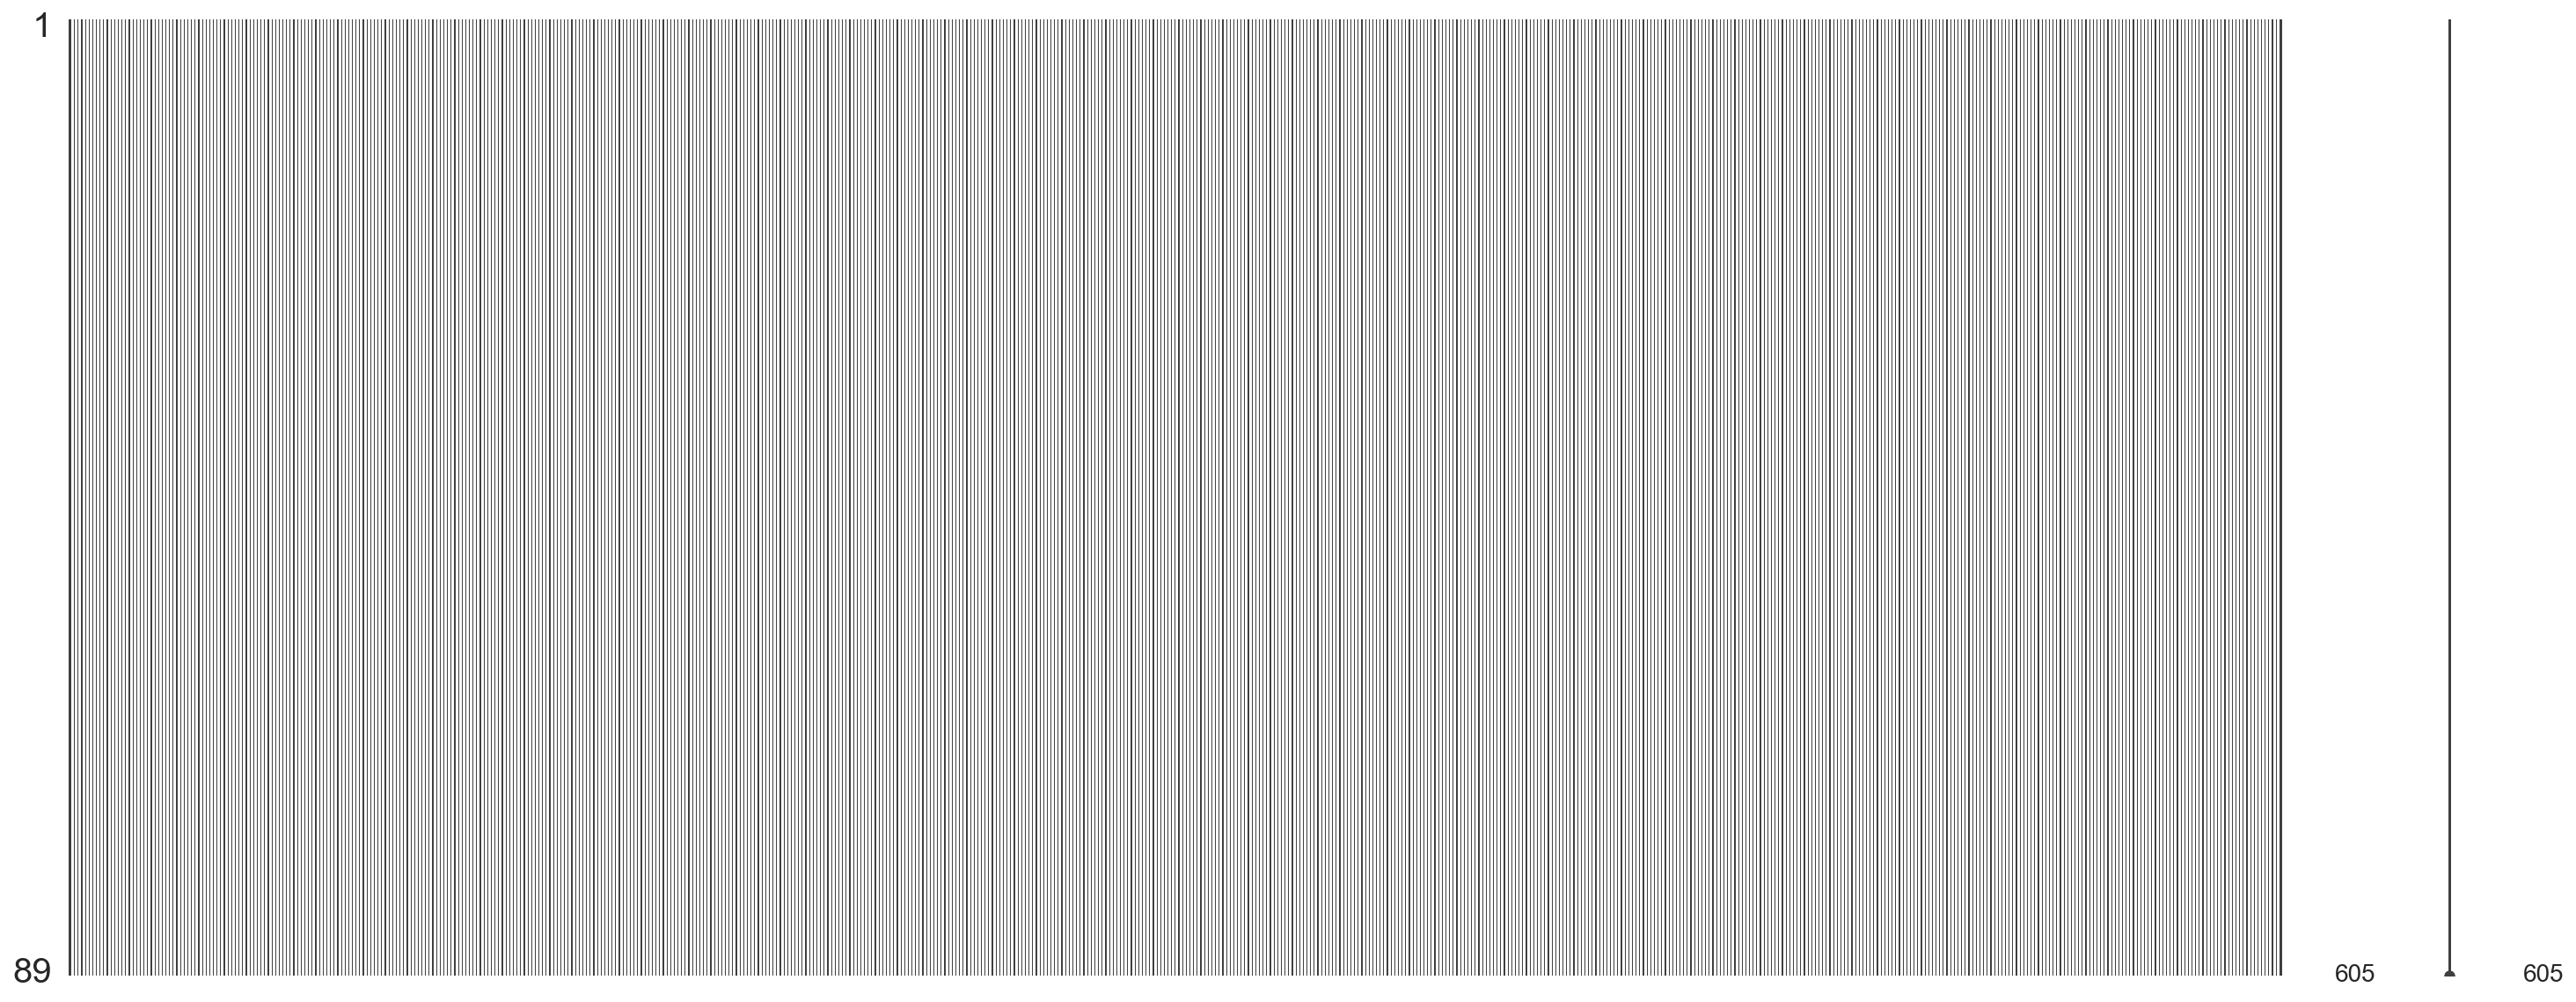

In [47]:
# 확인
msno.matrix(df3)

In [48]:
# 형변환
df3 = df3.apply(pd.to_numeric, errors='coerce')

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 89 entries, ('강원', '발생량', '소계') to ('합계', '처리량', '재활용')
Columns: 605 entries, ('1996', '총계', '소계', '소계') to ('2018', '음식물류폐기물분리배출', '소계', '소계')
dtypes: float64(605)
memory usage: 422.1+ KB


In [50]:
# 저장
df3.to_csv('./datas/waste.csv')

In [51]:
# 합계(전국) 인덱스만 추출
df_waste_total = df3.loc[[('합계', '발생량', '소계'), ('합계', '처리량', '기타'), ('합계', '처리량', '매 립'), ('합계', '처리량', '소 각'), ('합계', '처리량', '재활용')]]
df_waste_total

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타       0.0          0.0      0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 605 columns]

In [52]:
df_waste_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5 entries, ('합계', '발생량', '소계') to ('합계', '처리량', '재활용')
Columns: 605 entries, ('1996', '총계', '소계', '소계') to ('2018', '음식물류폐기물분리배출', '소계', '소계')
dtypes: float64(605)
memory usage: 24.8+ KB


In [53]:
df_waste_total.index

MultiIndex([('합계', '발생량',  '소계'),
            ('합계', '처리량',  '기타'),
            ('합계', '처리량', '매 립'),
            ('합계', '처리량', '소 각'),
            ('합계', '처리량', '재활용')],
           )

In [54]:
df_waste_total.isnull()

시도별(1)       1996                                                          \
시도별(1)         총계 종량제방식에의한혼합배출                                              
시도별(1)         소계          가연성                                              
시도별(1)         소계           소계 음식물 채소류    종이류    나무류  고무피혁류  플라스틱류     기타   
합계 발생량 소계   False        False   False  False  False  False  False  False   
   처리량 기타   False        False   False  False  False  False  False  False   
       매 립  False        False   False  False  False  False  False  False   
       소 각  False        False   False  False  False  False  False  False   
       재활용  False        False   False  False  False  False  False  False   

시도별(1)                    ...         2018                                     \
시도별(1)                    ... 재활용가능자원 분리배출                                      
시도별(1)        불연성         ...          윤활유    형광등    고철류     의류  영농폐기물    가구류   
시도별(1)         소계    연탄재  ...           소계     소계     소계     소계     소계     소계   
합계 발생량 소계   False  False  ...        False  False  False  False  False  False   
   처리량 기타   False  False  ...        False  False  False  False  False  False   
       매 립  False  False  ...        False  False  False  False  False  False   
       소 각  False  False  ...        False  False  False  False  False  False   
       재활용  False  False  ...        False  False  False  False  False  False   

시도별(1)                                       
시도별(1)                          음식물류폐기물분리배출  
시도별(1)       폐식용유 재활용잔재물     기타          소계  
시도별(1)         소계     소계     소계          소계  
합계 발생량 소계   False  False  False       False  
   처리량 기타   False  False  False       False  
       매 립  False  False  False       False  
       소 각  False  False  False       False  
       재활용  False  False  False       False  

[5 rows x 605 columns]

In [55]:
df_waste_total.isnull().sum()

시도별(1)  시도별(1)        시도별(1)  시도별(1) 
1996    총계            소계      소계         0
        종량제방식에의한혼합배출  가연성     소계         0
                              음식물 채소류    0
                              종이류        0
                              나무류        0
                                        ..
2018    재활용가능자원 분리배출  가구류     소계         0
                      폐식용유    소계         0
                      재활용잔재물  소계         0
                      기타      소계         0
        음식물류폐기물분리배출   소계      소계         0
Length: 605, dtype: int64

In [56]:
df_waste_total

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타       0.0          0.0      0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 605 columns]

In [57]:
df_waste_total.columns.values

array([('1996', '총계', '소계', '소계'), ('1996', '종량제방식에의한혼합배출', '가연성', '소계'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '소계'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '금속류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '토사류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '기타'),
       ('1996', '재활용가능자원 분리배출', '소계', '소계'),
       ('1996', '재활용가능자원 분리배출', '종이류', '소계'),
       ('1996', '재활용가능자원 분리배출', '유리병류', '소계'),
       ('1996', '재활용가능자원 분리배출', '캔류', '소계'),
       ('1996', '재활용가능자원 분리배출', '플라스틱류', '소계'),
       ('1996', '재활용가능자원 분리배출', '고철류', '소계'),
       ('1996', '재활용가능자원 분리배출', '기타', '소계'), ('1997', '총계', '소계', '소계'),
       ('1997', '종량제방식에의한혼합배출', '가연성', '소계'),
       (

In [58]:
len(df_waste_total.columns)

605

In [59]:
# 중분류의 소계 지우기

In [60]:
for i in range(1996, 2019):
    df_waste_total.drop([('{}'.format(i), '종량제방식에의한혼합배출', '가연성', '소계'),
               ('{}'.format(i), '종량제방식에의한혼합배출', '불연성', '소계'),
               ('{}'.format(i), '재활용가능자원 분리배출', '소계', '소계')], axis=1, inplace=True)
df_waste_total

시도별(1)         1996                                                       \
시도별(1)           총계 종량제방식에의한혼합배출                                           
시도별(1)           소계          가연성                                           
시도별(1)           소계      음식물 채소류     종이류     나무류   고무피혁류   플라스틱류      기타   
합계 발생량 소계   49925.2      14531.8  6379.7  1856.7  1121.9  2166.4  4249.2   
   처리량 기타       0.0          0.0     0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      13486.4  5276.5  1420.7   997.6  1907.6  3816.5   
       소 각   2725.0        569.5   994.7   386.0   111.3   229.2   377.6   
       재활용  13084.6        475.9   108.5    50.0    13.0    29.6    55.1   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)         불연성                  ...          윤활유   형광등     고철류     의류   
시도별(1)         연탄재     금속류     토사류  ...           소계    소계      소계     소계   
합계 발생량 소계   1852.9  1547.4  1410.1  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  1821.6  1408.2  1372.0  ...          0.0   0.0     0.0    0.0   
       소 각     0.0    12.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    31.3   127.2    38.1  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 536 columns]

In [61]:
len(df_waste_total.columns)

536

In [62]:
# 전국 단위 폐기물 종류별 데이터 저장
df_waste_total.to_csv('waste_total0210.csv')

## 4. 폐기물_종류별_재활용현황.csv

In [63]:
# multiindex 로 자료 불러오기
# skipinitialspace: True일때, 구분문자 이후의 공백을 생략

df4 = pd.DataFrame( )

for i in [11, 22]:    
    df = pd.read_csv('./datas/waste_plastic/{}.csv'.format(i), encoding='euc-kr',
                         header=[0,1], index_col=[0,1],
                         skipinitialspace=True)
    new_df = pd.concat([df4,df], axis=1, sort=False)
    df4 = new_df
    
df4

폐기물 종류별(1)                    2001                                             \
폐기물 종류별(1)           총계:가동업체수 (개소) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:판매총액 (천원)   
PCB함유폐기물  소계                     -                -            -            0   
          액상                     -                -            -            -   
          액상이 아닌것                -                -            -            -   
건설폐재류     소계                    90          2676873      2963244         5123   
          토사                    17           394070       229359       158808   
...                            ...              ...          ...          ...   
폐합성고분자화합물 폐합성고무류                48           107124        93812     10343126   
          폐합성수지기타              452           282684       332535    101988130   
폐흡착제.폐흡수제 소계                    20            17939       337601        12136   
          폐활성탄                  12             6264         3757      6450766   
          폐흡착제폐흡수제기타             8            11675       333843      5684805   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년) 허가:판매총액 (천원)   
PCB함유폐기물  소계                     -                -            -            0   
          액상                     -                -            -            -   
          액상이 아닌것                -                -            -            -   
건설폐재류     소계                    31          2016957      2365942          482   
          토사                     6           230160       116407        31877   
...                            ...              ...          ...          ...   
폐합성고분자화합물 폐합성고무류                 4             6528         6426        35601   
          폐합성수지기타               35            22388        21109      2541334   
폐흡착제.폐흡수제 소계                     7             7683       312844         2569   
          폐활성탄                   2             2437         1071       566348   
          폐흡착제폐흡수제기타             5             5246       311773      2002455   

폐기물 종류별(1)                                           ...         2015  \
폐기물 종류별(1)           신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  ... 총계:판매량 (톤/년)   
PCB함유폐기물  소계                     -                -  ...           64   
          액상                     -                -  ...            0   
          액상이 아닌것                -                -  ...           64   
건설폐재류     소계                    59           659916  ...          NaN   
          토사                    11           163910  ...          NaN   
...                            ...              ...  ...          ...   
폐합성고분자화합물 폐합성고무류                44           100596  ...       140012   
          폐합성수지기타              417           260296  ...      4044708   
폐흡착제.폐흡수제 소계                    13            10256  ...        12607   
          폐활성탄                  10             3827  ...         2700   
          폐흡착제폐흡수제기타             3             6429  ...         9907   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           총계:판매총액 (천원) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년)   
PCB함유폐기물  소계                20450             1               64           64   
          액상                    0             0                0            0   
          액상이 아닌것           20450             1               64           64   
건설폐재류     소계                  NaN           NaN              NaN          NaN   
          토사                  NaN           NaN              NaN          NaN   
...                           ...           ...              ...          ...   
폐합성고분자화합물 폐합성고무류         16665210           113           188102       139012   
          폐합성수지기타       855253377          1785          5367949      3966365   
폐흡착제.폐흡수제 소계             66011420            51            59837        12360   
          폐활성탄            1693646            11    

In [64]:
df4.head()

폐기물 종류별(1)                2001                                             \
폐기물 종류별(1)       총계:가동업체수 (개소) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:판매총액 (천원)   
PCB함유폐기물 소계                  -                -            -            0   
         액상                  -                -            -            -   
         액상이 아닌것             -                -            -            -   
건설폐재류    소계                 90          2676873      2963244         5123   
         토사                 17           394070       229359       158808   

폐기물 종류별(1)                                                                 \
폐기물 종류별(1)       허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년) 허가:판매총액 (천원)   
PCB함유폐기물 소계                  -                -            -            0   
         액상                  -                -            -            -   
         액상이 아닌것             -                -            -            -   
건설폐재류    소계                 31          2016957      2365942          482   
         토사                  6           230160       116407        31877   

폐기물 종류별(1)                                       ...         2015  \
폐기물 종류별(1)       신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  ... 총계:판매량 (톤/년)   
PCB함유폐기물 소계                  -                -  ...           64   
         액상                  -                -  ...            0   
         액상이 아닌것             -                -  ...           64   
건설폐재류    소계                 59           659916  ...          NaN   
         토사                 11           163910  ...          NaN   

폐기물 종류별(1)                                                                 \
폐기물 종류별(1)       총계:판매총액 (천원) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년)   
PCB함유폐기물 소계             20450             1               64           64   
         액상                 0             0                0            0   
         액상이 아닌것        20450             1               64           64   
건설폐재류    소계               NaN           NaN              NaN          NaN   
         토사               NaN           NaN              NaN          NaN   

폐기물 종류별(1)                                                                 \
폐기물 종류별(1)       허가:판매총액 (천원) 신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년) 신고:판매량 (톤/년)   
PCB함유폐기물 소계             20450             0                0            0   
         액상                 0             0                0            0   
         액상이 아닌것        20450             0                0            0   
건설폐재류    소계               NaN           NaN              NaN          NaN   
         토사               NaN           NaN              NaN          NaN   

폐기물 종류별(1)                     
폐기물 종류별(1)       신고:판매총액 (천원)  
PCB함유폐기물 소계                 0  
         액상                 0  
         액상이 아닌것            0  
건설폐재류    소계               NaN  
         토사               NaN  

[5 rows x 180 columns]

In [65]:
df4.tail()

폐기물 종류별(1)                    2001                                             \
폐기물 종류별(1)           총계:가동업체수 (개소) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:판매총액 (천원)   
폐합성고분자화합물 폐합성고무류                48           107124        93812     10343126   
          폐합성수지기타              452           282684       332535    101988130   
폐흡착제.폐흡수제 소계                    20            17939       337601        12136   
          폐활성탄                  12             6264         3757      6450766   
          폐흡착제폐흡수제기타             8            11675       333843      5684805   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년) 허가:판매총액 (천원)   
폐합성고분자화합물 폐합성고무류                 4             6528         6426        35601   
          폐합성수지기타               35            22388        21109      2541334   
폐흡착제.폐흡수제 소계                     7             7683       312844         2569   
          폐활성탄                   2             2437         1071       566348   
          폐흡착제폐흡수제기타             5             5246       311773      2002455   

폐기물 종류별(1)                                           ...         2015  \
폐기물 종류별(1)           신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  ... 총계:판매량 (톤/년)   
폐합성고분자화합물 폐합성고무류                44           100596  ...       140012   
          폐합성수지기타              417           260296  ...      4044708   
폐흡착제.폐흡수제 소계                    13            10256  ...        12607   
          폐활성탄                  10             3827  ...         2700   
          폐흡착제폐흡수제기타             3             6429  ...         9907   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           총계:판매총액 (천원) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년)   
폐합성고분자화합물 폐합성고무류         16665210           113           188102       139012   
          폐합성수지기타       855253377          1785          5367949      3966365   
폐흡착제.폐흡수제 소계             66011420            51            59837        12360   
          폐활성탄            1693646            11             2040         2700   
          폐흡착제폐흡수제기타     64317775            40            57797         9661   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           허가:판매총액 (천원) 신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년) 신고:판매량 (톤/년)   
폐합성고분자화합물 폐합성고무류         16165210             4             1715         1000   
          폐합성수지기타       829798981           158           251363        78344   
폐흡착제.폐흡수제 소계             65856135             1              723          246   
          폐활성탄            1693646             0                0            0   
          폐흡착제폐흡수제기타     64162489             1              723          246   

폐기물 종류별(1)                         
폐기물 종류별(1)           신고:판매총액 (천원)  
폐합성고분자화합물 폐합성고무류           500000  
          폐합성수지기타        25454396  
폐흡착제.폐흡수제 소계               155286  
          폐활성탄                  0  
          폐흡착제폐흡수제기타       155286  

[5 rows x 180 columns]

In [66]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 136 entries, ('PCB함유폐기물', '소계') to ('폐흡착제.폐흡수제', '폐흡착제폐흡수제기타')
Columns: 180 entries, ('2001', '총계:가동업체수 (개소)') to ('2015', '신고:판매총액 (천원)')
dtypes: float64(24), int64(12), object(144)
memory usage: 197.7+ KB


<AxesSubplot:>

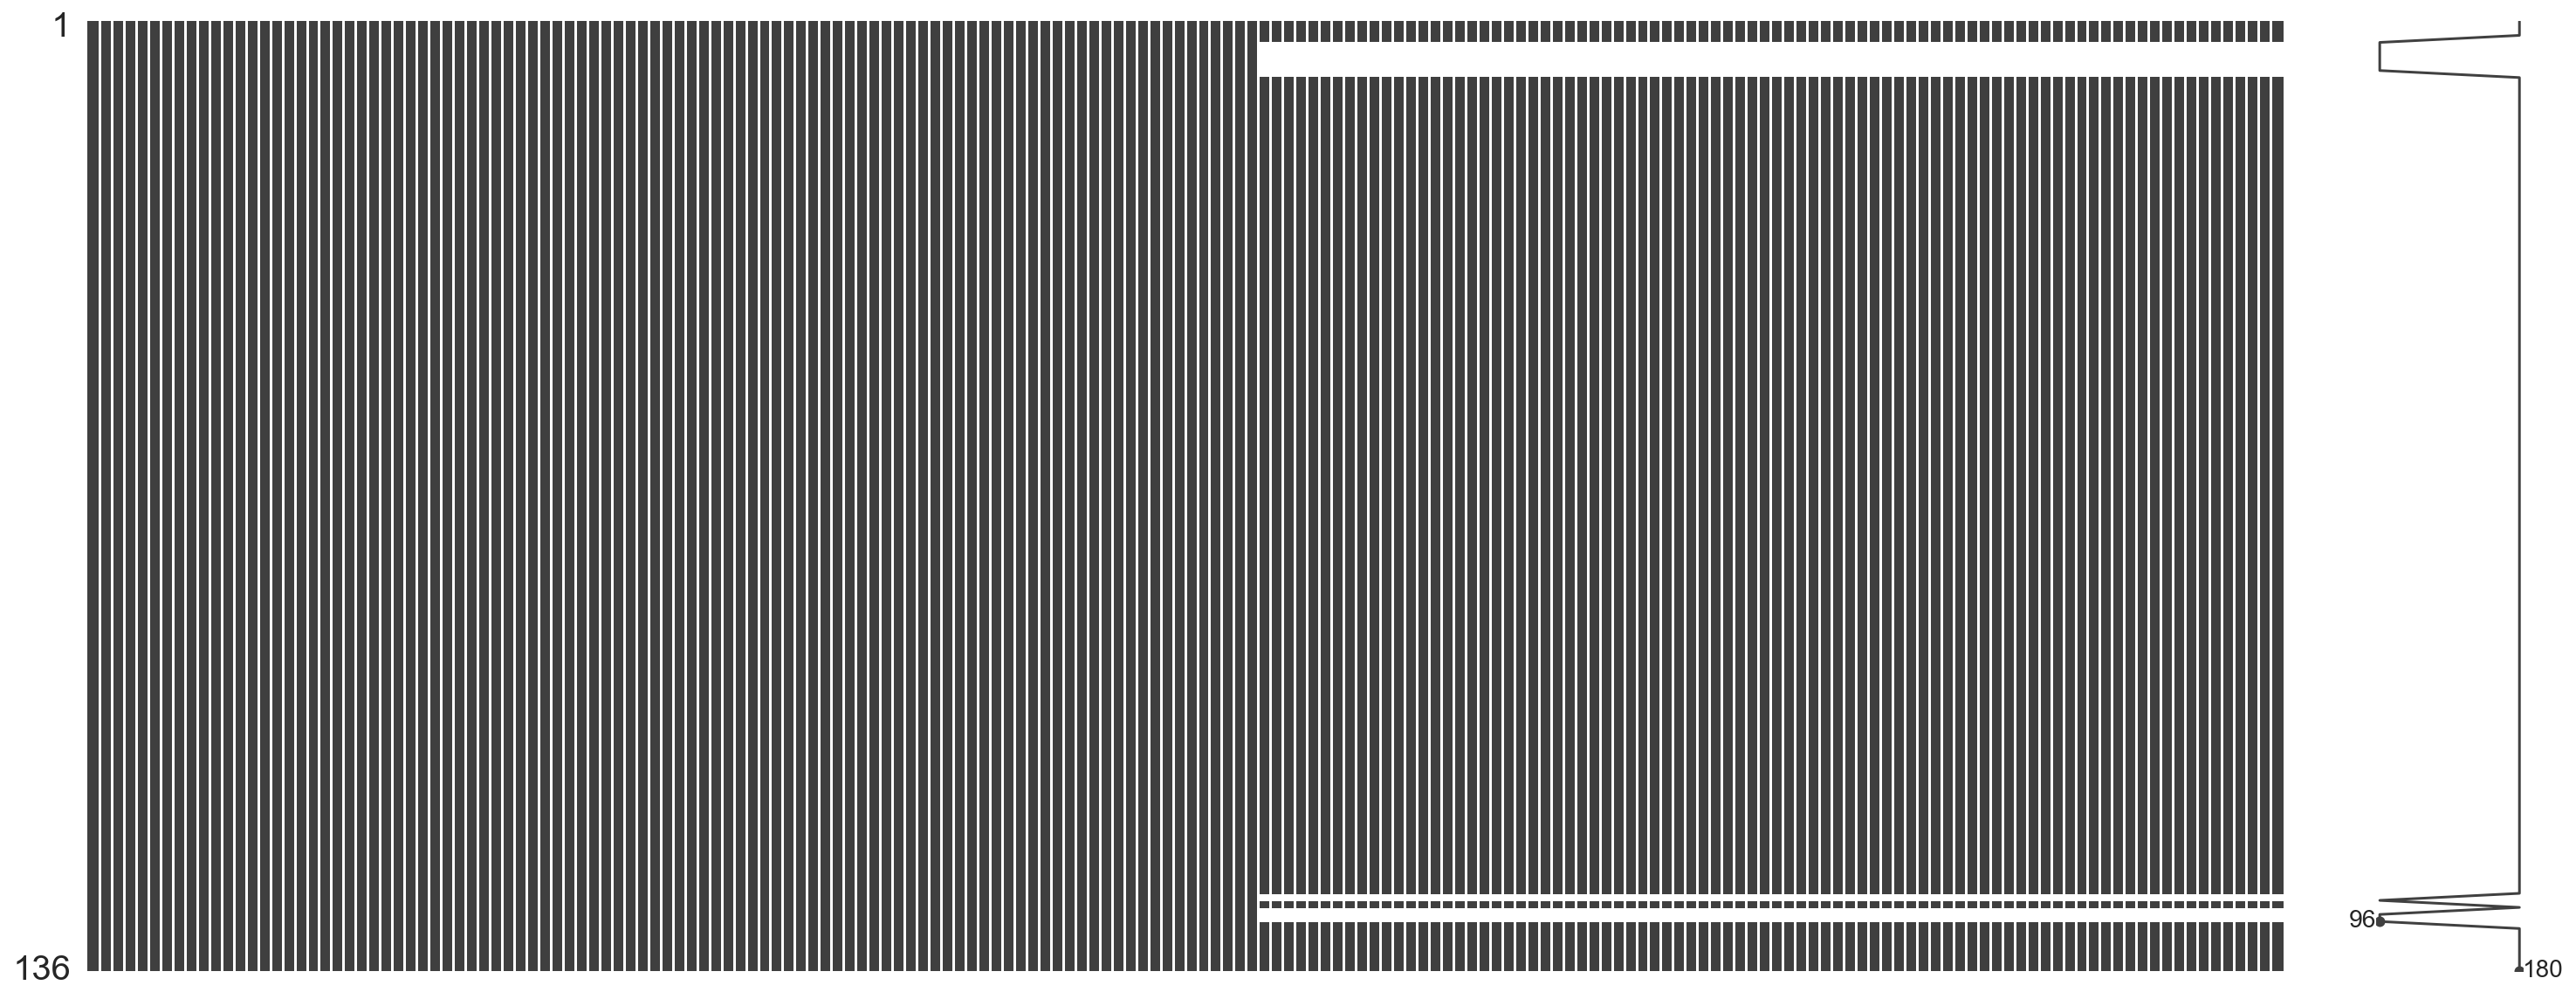

In [67]:
msno.matrix(df4)

In [68]:
df4.isnull()

폐기물 종류별(1)                    2001                                             \
폐기물 종류별(1)           총계:가동업체수 (개소) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:판매총액 (천원)   
PCB함유폐기물  소계                 False            False        False        False   
          액상                 False            False        False        False   
          액상이 아닌것            False            False        False        False   
건설폐재류     소계                 False            False        False        False   
          토사                 False            False        False        False   
...                            ...              ...          ...          ...   
폐합성고분자화합물 폐합성고무류             False            False        False        False   
          폐합성수지기타            False            False        False        False   
폐흡착제.폐흡수제 소계                 False            False        False        False   
          폐활성탄               False            False        False        False   
          폐흡착제폐흡수제기타         False            False        False        False   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년) 허가:판매총액 (천원)   
PCB함유폐기물  소계                 False            False        False        False   
          액상                 False            False        False        False   
          액상이 아닌것            False            False        False        False   
건설폐재류     소계                 False            False        False        False   
          토사                 False            False        False        False   
...                            ...              ...          ...          ...   
폐합성고분자화합물 폐합성고무류             False            False        False        False   
          폐합성수지기타            False            False        False        False   
폐흡착제.폐흡수제 소계                 False            False        False        False   
          폐활성탄               False            False        False        False   
          폐흡착제폐흡수제기타         False            False        False        False   

폐기물 종류별(1)                                           ...         2015  \
폐기물 종류별(1)           신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  ... 총계:판매량 (톤/년)   
PCB함유폐기물  소계                 False            False  ...        False   
          액상                 False            False  ...        False   
          액상이 아닌것            False            False  ...        False   
건설폐재류     소계                 False            False  ...         True   
          토사                 False            False  ...         True   
...                            ...              ...  ...          ...   
폐합성고분자화합물 폐합성고무류             False            False  ...        False   
          폐합성수지기타            False            False  ...        False   
폐흡착제.폐흡수제 소계                 False            False  ...        False   
          폐활성탄               False            False  ...        False   
          폐흡착제폐흡수제기타         False            False  ...        False   

폐기물 종류별(1)                                                                     \
폐기물 종류별(1)           총계:판매총액 (천원) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년)   
PCB함유폐기물  소계                False         False            False        False   
          액상                False         False            False        False   
          액상이 아닌것           False         False            False        False   
건설폐재류     소계                 True          True             True         True   
          토사                 True          True             True         True   
...                           ...           ...              ...          ...   
폐합성고분자화합물 폐합성고무류            False         False            False        False   
          폐합성수지기타           False         False            False        False   
폐흡착제.폐흡수제 소계                False         False            False        False   
          폐활성탄              False         False    

In [69]:
df4.columns.values

array([('2001', '총계:가동업체수 (개소)'), ('2001', '총계:재활용폐기물량 (톤/년)'),
       ('2001', '총계:판매량 (톤/년)'), ('2001', '총계:판매총액 (천원)'),
       ('2001', '허가:가동업체수 (개소)'), ('2001', '허가:재활용폐기물량 (톤/년)'),
       ('2001', '허가:판매량 (톤/년)'), ('2001', '허가:판매총액 (천원)'),
       ('2001', '신고:가동업체수 (개소)'), ('2001', '신고:재활용폐기물량 (톤/년)'),
       ('2001', '신고:판매량 (톤/년)'), ('2001', '신고:판매총액 (천원)'),
       ('2002', '총계:가동업체수 (개소)'), ('2002', '총계:재활용폐기물량 (톤/년)'),
       ('2002', '총계:판매량 (톤/년)'), ('2002', '총계:판매총액 (천원)'),
       ('2002', '허가:가동업체수 (개소)'), ('2002', '허가:재활용폐기물량 (톤/년)'),
       ('2002', '허가:판매량 (톤/년)'), ('2002', '허가:판매총액 (천원)'),
       ('2002', '신고:가동업체수 (개소)'), ('2002', '신고:재활용폐기물량 (톤/년)'),
       ('2002', '신고:판매량 (톤/년)'), ('2002', '신고:판매총액 (천원)'),
       ('2003', '총계:가동업체수 (개소)'), ('2003', '총계:재활용폐기물량 (톤/년)'),
       ('2003', '총계:판매량 (톤/년)'), ('2003', '총계:판매총액 (천원)'),
       ('2003', '허가:가동업체수 (개소)'), ('2003', '허가:재활용폐기물량 (톤/년)'),
       ('2003', '허가:판매량 (톤/년)'), ('2003', '허가:판매총액 (천원)'),
       ('2003', 

In [70]:
df4.index.values

array([('PCB함유폐기물', '소계'), ('PCB함유폐기물', '액상'), ('PCB함유폐기물', '액상이 아닌것'),
       ('건설폐재류', '소계'), ('건설폐재류', '토사'), ('건설폐재류', '폐벽돌'),
       ('건설폐재류', '폐아스팔트'), ('건설폐재류', '폐콘크리트'), ('계', '소계'),
       ('광재', '고로슬래그'), ('광재', '기타광재류'), ('광재', '불연소탄'), ('광재', '소계'),
       ('광재', '유해물질함유광재'), ('광재', '제강슬래그'), ('금속류', '기타금속류'),
       ('금속류', '비철계금속'), ('금속류', '소계'), ('금속류', '철계금속'), ('기타', '소계'),
       ('기타화학물질별', '기타화학물질'), ('기타화학물질별', '무기화학물'), ('기타화학물질별', '소계'),
       ('기타화학물질별', '유기화학물'), ('동식물성잔재물', '기타동물성잔재물'),
       ('동식물성잔재물', '도축가공잔재물'), ('동식물성잔재물', '소계'), ('동식물성잔재물', '수산가공잔재물'),
       ('동식물성잔재물', '식물성잔재물'), ('분진', 'CARBON BLACK'), ('분진', '기타분진'),
       ('분진', '소계'), ('분진', '유해물질함유분재'), ('분진', '집진DUST'),
       ('소각잔재물및연소재', 'FLY ASH'), ('소각잔재물및연소재', '기타연소재'),
       ('소각잔재물및연소재', '석탄재'), ('소각잔재물및연소재', '소계'), ('소각잔재물및연소재', '액체연료'),
       ('소각잔재물및연소재', '연소재폐기물소각재'), ('안정화또는고형화처리물', '소계'),
       ('오니류', '기타폐수처리오니'), ('오니류', '소계'), ('오니류', '유해물질비함유 공정오니'),
       ('오니류', '유해물질비

In [71]:
# - 데이터 0으로 채우기
df4.replace('-', 0, inplace=True)

In [72]:
# NaN 데이터 0으로 채우기
df4.fillna(value=0, inplace=True)

In [73]:
df4.head()

폐기물 종류별(1)                2001                                             \
폐기물 종류별(1)       총계:가동업체수 (개소) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:판매총액 (천원)   
PCB함유폐기물 소계                  0                0            0            0   
         액상                  0                0            0            0   
         액상이 아닌것             0                0            0            0   
건설폐재류    소계                 90          2676873      2963244         5123   
         토사                 17           394070       229359       158808   

폐기물 종류별(1)                                                                 \
폐기물 종류별(1)       허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년) 허가:판매총액 (천원)   
PCB함유폐기물 소계                  0                0            0            0   
         액상                  0                0            0            0   
         액상이 아닌것             0                0            0            0   
건설폐재류    소계                 31          2016957      2365942          482   
         토사                  6           230160       116407        31877   

폐기물 종류별(1)                                       ...         2015  \
폐기물 종류별(1)       신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  ... 총계:판매량 (톤/년)   
PCB함유폐기물 소계                  0                0  ...           64   
         액상                  0                0  ...            0   
         액상이 아닌것             0                0  ...           64   
건설폐재류    소계                 59           659916  ...            0   
         토사                 11           163910  ...            0   

폐기물 종류별(1)                                                                 \
폐기물 종류별(1)       총계:판매총액 (천원) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년) 허가:판매량 (톤/년)   
PCB함유폐기물 소계             20450             1               64           64   
         액상                 0             0                0            0   
         액상이 아닌것        20450             1               64           64   
건설폐재류    소계                 0             0                0            0   
         토사                 0             0                0            0   

폐기물 종류별(1)                                                                 \
폐기물 종류별(1)       허가:판매총액 (천원) 신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년) 신고:판매량 (톤/년)   
PCB함유폐기물 소계             20450             0                0            0   
         액상                 0             0                0            0   
         액상이 아닌것        20450             0                0            0   
건설폐재류    소계                 0             0                0            0   
         토사                 0             0                0            0   

폐기물 종류별(1)                     
폐기물 종류별(1)       신고:판매총액 (천원)  
PCB함유폐기물 소계                 0  
         액상                 0  
         액상이 아닌것            0  
건설폐재류    소계                 0  
         토사                 0  

[5 rows x 180 columns]

<AxesSubplot:>

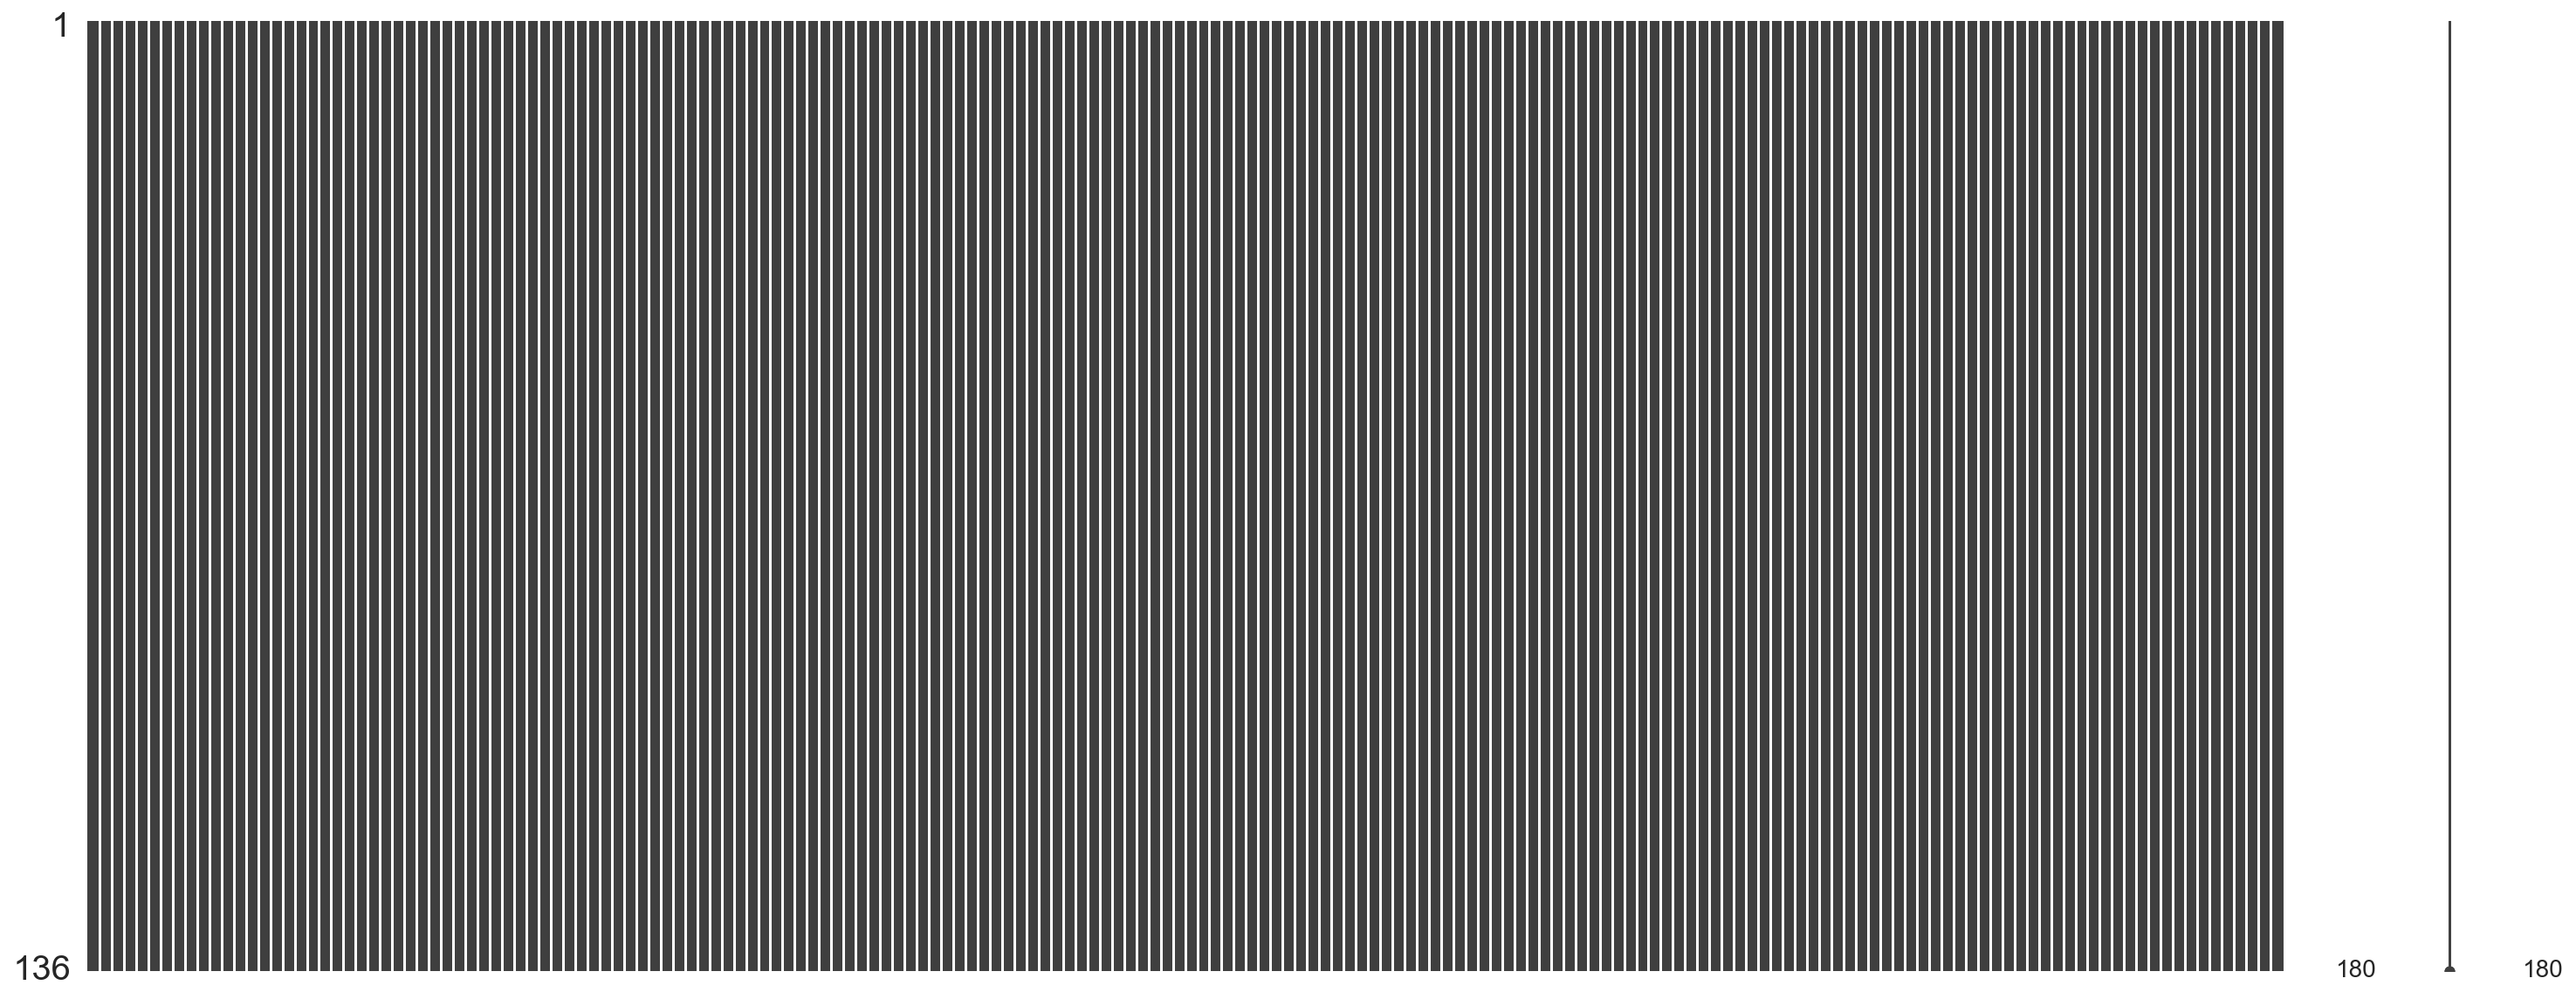

In [74]:
# 확인
msno.matrix(df4)

In [75]:
df4 = df4.apply(pd.to_numeric, errors='coerce')

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 136 entries, ('PCB함유폐기물', '소계') to ('폐흡착제.폐흡수제', '폐흡착제폐흡수제기타')
Columns: 180 entries, ('2001', '총계:가동업체수 (개소)') to ('2015', '신고:판매총액 (천원)')
dtypes: float64(24), int64(156)
memory usage: 197.7+ KB


In [77]:
# 저장
df4.to_csv('./datas/waste_plastic.csv')

In [78]:
df4.describe()

폐기물 종류별(1)          2001                                               \
폐기물 종류별(1) 총계:가동업체수 (개소) 총계:재활용폐기물량 (톤/년)  총계:판매량 (톤/년)  총계:판매총액 (천원)   
count         136.000000     1.360000e+02  1.360000e+02  1.360000e+02   
mean           77.669118     5.935140e+05  1.244319e+06  2.785760e+07   
std           330.490277     2.505928e+06  5.347924e+06  7.574475e+07   
min             0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
25%             4.000000     6.066750e+03  4.909500e+03  4.614575e+04   
50%            19.500000     5.529100e+04  6.952400e+04  2.921166e+06   
75%            64.250000     2.975378e+05  4.264505e+05  1.959761e+07   
max          3652.000000     2.723998e+07  5.681146e+07  4.813511e+08   

폐기물 종류별(1)                                                             \
폐기물 종류별(1) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년)  허가:판매량 (톤/년)  허가:판매총액 (천원)   
count         136.000000     1.360000e+02  1.360000e+02  1.360000e+02   
mean           16.992647     1.468158e+05  1.734356e+05  2.551080e+06   
std            71.024930     6.277065e+05  7.504089e+05  6.319686e+06   
min             0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
25%             0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
50%             4.000000     6.014000e+03  6.787000e+03  5.408300e+04   
75%            13.000000     5.306725e+04  8.608375e+04  1.782423e+06   
max           809.000000     6.706129e+06  8.013336e+06  4.152064e+07   

폐기물 종류별(1)                                 ...          2015                \
폐기물 종류별(1) 신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  ...  총계:판매량 (톤/년)  총계:판매총액 (천원)   
count         136.000000     1.360000e+02  ...  1.360000e+02  1.360000e+02   
mean           60.676471     4.466983e+05  ...  6.063729e+05  1.066371e+08   
std           263.813202     1.931718e+06  ...  2.582100e+06  4.630936e+08   
min             0.000000     0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%             0.750000     1.275000e+01  ...  0.000000e+00  0.000000e+00   
50%             9.500000     2.599600e+04  ...  1.042200e+04  2.382096e+06   
75%            44.500000     1.735722e+05  ...  3.035812e+05  5.434197e+07   
max          2843.000000     2.053384e+07  ...  2.850938e+07  4.964970e+09   

폐기물 종류별(1)                                                             \
폐기물 종류별(1) 허가:가동업체수 (개소) 허가:재활용폐기물량 (톤/년)  허가:판매량 (톤/년)  허가:판매총액 (천원)   
count         136.000000     1.360000e+02  1.360000e+02  1.360000e+02   
mean          132.102941     7.069439e+05  4.665413e+05  8.323695e+07   
std           580.373408     2.958603e+06  1.967292e+06  3.540175e+08   
min             0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
25%             0.000000     0.000000e+00  0.000000e+00  0.000000e+00   
50%            11.500000     1.296500e+04  1.029450e+04  2.325346e+06   
75%            81.750000     4.010750e+05  2.569275e+05  5.106373e+07   
max          6088.000000     3.261333e+07  2.156169e+07  3.831349e+09   

폐기물 종류별(1)                                                             
폐기물 종류별(1) 신고:가동업체수 (개소) 신고:재활용폐기물량 (톤/년)  신고:판매량 (톤/년)  신고:판매총액 (천원)  
count         136.000000     1.360000e+02  1.360000e+02  1.360000e+02  
mean           39.867647     1.895153e+05  1.398316e+05  2.340013e+07  
std           191.428850     9.319947e+05  7.350164e+05  1.365504e+08  
min             0.000000     0.000000e+00  0.000000e+00  0.000000e+00  
25%             0.000000     0.000000e+00  0.000000e+00  0.000000e+00  
50%             0.000000     0.000000e+00  0.000000e+00  0.000000e+00  
75%             8.250000     8.980750e+03  1.024750e+03  4.295080e+05  
max          2051.000000     9.320620e+06  6.947683e+06  1.133621e+09  

[8 rows x 180 columns]

In [79]:
# 총계 = 허가 + 신고
# 연도별 총계:재활용폐기물량 (톤/년), 총계:판매량 (톤/년) 데이터만 추출

df_wp_total = pd.DataFrame( )

for i in range(2001, 2016):
    df = df4[[('{}'.format(i), '총계:재활용폐기물량 (톤/년)'),
                       ('{}'.format(i), '총계:판매량 (톤/년)')]]
    new_df = pd.concat([df_wp_total,df], axis=1, sort=False)
    df_wp_total = new_df
    
df_wp_total

폐기물 종류별(1)                       2001                          2002  \
폐기물 종류별(1)           총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년)   
PCB함유폐기물  소계                        0            0                0   
          액상                        0            0                0   
          액상이 아닌것                   0            0                0   
건설폐재류     소계                  2676873      2963244          3375837   
          토사                   394070       229359           865082   
...                               ...          ...              ...   
폐합성고분자화합물 폐합성고무류               107124        93812           122398   
          폐합성수지기타              282684       332535           194711   
폐흡착제.폐흡수제 소계                    17939       337601            22102   
          폐활성탄                   6264         3757            13369   
          폐흡착제폐흡수제기타            11675       333843             8733   

폐기물 종류별(1)                                    2003               \
폐기물 종류별(1)           총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년)   
PCB함유폐기물  소계                    0                0            0   
          액상                    0                0            0   
          액상이 아닌것               0                0            0   
건설폐재류     소계              2966760          4612029      4987501   
          토사               541671           811514      1233377   
...                           ...              ...          ...   
폐합성고분자화합물 폐합성고무류            28759            82017       628166   
          폐합성수지기타          112250           443953       392811   
폐흡착제.폐흡수제 소계                30853            44768        84172   
          폐활성탄               7042            37415         8337   
          폐흡착제폐흡수제기타        23811             7353        75835   

폐기물 종류별(1)                       2004                          2005  \
폐기물 종류별(1)           총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년)   
PCB함유폐기물  소계                        0            0                0   
          액상                        0            0                0   
          액상이 아닌것                   0            0                0   
건설폐재류     소계                  6126144      4855792                0   
          토사                  1931044      1524353                0   
...                               ...          ...              ...   
폐합성고분자화합물 폐합성고무류                69973        38477           185985   
          폐합성수지기타              746415       579262           839997   
폐흡착제.폐흡수제 소계                    20024        14562            39061   
          폐활성탄                  17369        10092            31458   
          폐흡착제폐흡수제기타             2655         4470             7603   

폐기물 종류별(1)                         ...             2011               \
폐기물 종류별(1)           총계:판매량 (톤/년)  ... 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년)   
PCB함유폐기물  소계                    0  ...              0.0          0.0   
          액상                    0  ...              0.0          0.0   
          액상이 아닌것               0  ...              0.0          0.0   
건설폐재류     소계                    0  ...              0.0          0.0   
          토사                    0  ...              0.0          0.0   
...                           ...  ...              ...          ...   
폐합성고분자화합물 폐합성고무류            29903  ...          55506.0      67700.0   
          폐합성수지기타          594066  ...        3186638.0    3388154.0   
폐흡착제.폐흡수제 소계                35920  ...          42273.0      17864.0   
          폐활성탄              22649  ...           4932.0       2000.0   
          폐흡착제폐흡수제기타        13271  ...          37341.0      15865.0   

폐기물 종류별(1)                       2012                          2013  \
폐기물 종류별(1)           총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년)   
PCB함유폐기물  소계                       10           10                5   
          액상                        0            0                0   
          액상이 아닌것                  10           10         

In [80]:
df_wp_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 136 entries, ('PCB함유폐기물', '소계') to ('폐흡착제.폐흡수제', '폐흡착제폐흡수제기타')
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (2001, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 1   (2001, 총계:판매량 (톤/년))      136 non-null    int64  
 2   (2002, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 3   (2002, 총계:판매량 (톤/년))      136 non-null    int64  
 4   (2003, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 5   (2003, 총계:판매량 (톤/년))      136 non-null    int64  
 6   (2004, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 7   (2004, 총계:판매량 (톤/년))      136 non-null    int64  
 8   (2005, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 9   (2005, 총계:판매량 (톤/년))      136 non-null    int64  
 10  (2006, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 11  (2006, 총계:판매량 (톤/년))      136 non-null    int64  
 12  (2007, 총계:재활용폐기물량 (톤/년))  136 non-null    int64  
 13  (2007, 총계:판매량 (톤/년))    

In [81]:
df_wp_total.columns.values

array([('2001', '총계:재활용폐기물량 (톤/년)'), ('2001', '총계:판매량 (톤/년)'),
       ('2002', '총계:재활용폐기물량 (톤/년)'), ('2002', '총계:판매량 (톤/년)'),
       ('2003', '총계:재활용폐기물량 (톤/년)'), ('2003', '총계:판매량 (톤/년)'),
       ('2004', '총계:재활용폐기물량 (톤/년)'), ('2004', '총계:판매량 (톤/년)'),
       ('2005', '총계:재활용폐기물량 (톤/년)'), ('2005', '총계:판매량 (톤/년)'),
       ('2006', '총계:재활용폐기물량 (톤/년)'), ('2006', '총계:판매량 (톤/년)'),
       ('2007', '총계:재활용폐기물량 (톤/년)'), ('2007', '총계:판매량 (톤/년)'),
       ('2008', '총계:재활용폐기물량 (톤/년)'), ('2008', '총계:판매량 (톤/년)'),
       ('2009', '총계:재활용폐기물량 (톤/년)'), ('2009', '총계:판매량 (톤/년)'),
       ('2010', '총계:재활용폐기물량 (톤/년)'), ('2010', '총계:판매량 (톤/년)'),
       ('2011', '총계:재활용폐기물량 (톤/년)'), ('2011', '총계:판매량 (톤/년)'),
       ('2012', '총계:재활용폐기물량 (톤/년)'), ('2012', '총계:판매량 (톤/년)'),
       ('2013', '총계:재활용폐기물량 (톤/년)'), ('2013', '총계:판매량 (톤/년)'),
       ('2014', '총계:재활용폐기물량 (톤/년)'), ('2014', '총계:판매량 (톤/년)'),
       ('2015', '총계:재활용폐기물량 (톤/년)'), ('2015', '총계:판매량 (톤/년)')],
      dtype=object)

In [82]:
df_wp_total.index.values

array([('PCB함유폐기물', '소계'), ('PCB함유폐기물', '액상'), ('PCB함유폐기물', '액상이 아닌것'),
       ('건설폐재류', '소계'), ('건설폐재류', '토사'), ('건설폐재류', '폐벽돌'),
       ('건설폐재류', '폐아스팔트'), ('건설폐재류', '폐콘크리트'), ('계', '소계'),
       ('광재', '고로슬래그'), ('광재', '기타광재류'), ('광재', '불연소탄'), ('광재', '소계'),
       ('광재', '유해물질함유광재'), ('광재', '제강슬래그'), ('금속류', '기타금속류'),
       ('금속류', '비철계금속'), ('금속류', '소계'), ('금속류', '철계금속'), ('기타', '소계'),
       ('기타화학물질별', '기타화학물질'), ('기타화학물질별', '무기화학물'), ('기타화학물질별', '소계'),
       ('기타화학물질별', '유기화학물'), ('동식물성잔재물', '기타동물성잔재물'),
       ('동식물성잔재물', '도축가공잔재물'), ('동식물성잔재물', '소계'), ('동식물성잔재물', '수산가공잔재물'),
       ('동식물성잔재물', '식물성잔재물'), ('분진', 'CARBON BLACK'), ('분진', '기타분진'),
       ('분진', '소계'), ('분진', '유해물질함유분재'), ('분진', '집진DUST'),
       ('소각잔재물및연소재', 'FLY ASH'), ('소각잔재물및연소재', '기타연소재'),
       ('소각잔재물및연소재', '석탄재'), ('소각잔재물및연소재', '소계'), ('소각잔재물및연소재', '액체연료'),
       ('소각잔재물및연소재', '연소재폐기물소각재'), ('안정화또는고형화처리물', '소계'),
       ('오니류', '기타폐수처리오니'), ('오니류', '소계'), ('오니류', '유해물질비함유 공정오니'),
       ('오니류', '유해물질비

In [83]:
df_wp_total.isnull().sum()

폐기물 종류별(1)  폐기물 종류별(1)      
2001        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2002        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2003        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2004        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2005        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2006        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2007        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2008        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2009        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2010        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2011        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2012        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2013        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2014        총계:재활용폐기물량 (톤/년)    0
            총계:판매량 (톤/년)        0
2015        총계:재활용폐

In [84]:
df_wp_total

폐기물 종류별(1)                       2001                          2002  \
폐기물 종류별(1)           총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년)   
PCB함유폐기물  소계                        0            0                0   
          액상                        0            0                0   
          액상이 아닌것                   0            0                0   
건설폐재류     소계                  2676873      2963244          3375837   
          토사                   394070       229359           865082   
...                               ...          ...              ...   
폐합성고분자화합물 폐합성고무류               107124        93812           122398   
          폐합성수지기타              282684       332535           194711   
폐흡착제.폐흡수제 소계                    17939       337601            22102   
          폐활성탄                   6264         3757            13369   
          폐흡착제폐흡수제기타            11675       333843             8733   

폐기물 종류별(1)                                    2003               \
폐기물 종류별(1)           총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년)   
PCB함유폐기물  소계                    0                0            0   
          액상                    0                0            0   
          액상이 아닌것               0                0            0   
건설폐재류     소계              2966760          4612029      4987501   
          토사               541671           811514      1233377   
...                           ...              ...          ...   
폐합성고분자화합물 폐합성고무류            28759            82017       628166   
          폐합성수지기타          112250           443953       392811   
폐흡착제.폐흡수제 소계                30853            44768        84172   
          폐활성탄               7042            37415         8337   
          폐흡착제폐흡수제기타        23811             7353        75835   

폐기물 종류별(1)                       2004                          2005  \
폐기물 종류별(1)           총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년)   
PCB함유폐기물  소계                        0            0                0   
          액상                        0            0                0   
          액상이 아닌것                   0            0                0   
건설폐재류     소계                  6126144      4855792                0   
          토사                  1931044      1524353                0   
...                               ...          ...              ...   
폐합성고분자화합물 폐합성고무류                69973        38477           185985   
          폐합성수지기타              746415       579262           839997   
폐흡착제.폐흡수제 소계                    20024        14562            39061   
          폐활성탄                  17369        10092            31458   
          폐흡착제폐흡수제기타             2655         4470             7603   

폐기물 종류별(1)                         ...             2011               \
폐기물 종류별(1)           총계:판매량 (톤/년)  ... 총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년)   
PCB함유폐기물  소계                    0  ...              0.0          0.0   
          액상                    0  ...              0.0          0.0   
          액상이 아닌것               0  ...              0.0          0.0   
건설폐재류     소계                    0  ...              0.0          0.0   
          토사                    0  ...              0.0          0.0   
...                           ...  ...              ...          ...   
폐합성고분자화합물 폐합성고무류            29903  ...          55506.0      67700.0   
          폐합성수지기타          594066  ...        3186638.0    3388154.0   
폐흡착제.폐흡수제 소계                35920  ...          42273.0      17864.0   
          폐활성탄              22649  ...           4932.0       2000.0   
          폐흡착제폐흡수제기타        13271  ...          37341.0      15865.0   

폐기물 종류별(1)                       2012                          2013  \
폐기물 종류별(1)           총계:재활용폐기물량 (톤/년) 총계:판매량 (톤/년) 총계:재활용폐기물량 (톤/년)   
PCB함유폐기물  소계                       10           10                5   
          액상                        0            0                0   
          액상이 아닌것                  10           10         

In [85]:
# 저장
df_wp_total.to_csv('wp_total2010.csv')